### TC-1

### Governing Equation:
$$
\frac{du}{dx} = R, \quad \text{for } 0 < x \leq 1
$$

### Exact Solution:
$$
u(x) = \sin(2\pi x) \cdot \cos(4\pi x) + 1
$$

### RHS (Source Term):
$$
\frac{du}{dx} = 2\pi \cdot \cos(2\pi x) \cdot \cos(4\pi x) - 4\pi \cdot \sin(2\pi x) \cdot \sin(4\pi x)
$$

### Boundary Conditions (Dirichlet):
- $u(0) = \sin(0) \cdot \cos(0) + 1 = 1$
- $u(1) = \sin(2\pi) \cdot \cos(4\pi) + 1 = 1$




Condition number of H^T H: 1.51e+19
Mean Absolute Error (MAE): 3.284178e-03
Root Mean Square Error (RMSE): 3.793770e-03
CPU Time (Tcpu): 1.541138e-02 seconds


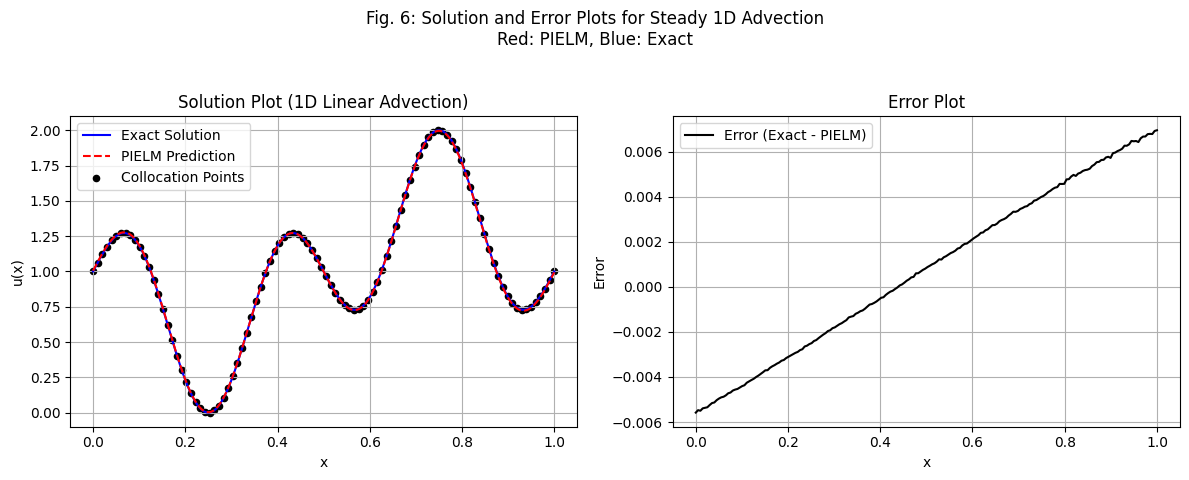

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Derivative of the tanh activation function.
    Required for enforcing the differential equation at collocation points.
    """
    return 1 - np.tanh(z)**2

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(2 * np.pi * x) * np.cos(4 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u'(x) = f(x).
    This function represents f(x) and is derived from the exact solution.
    """
    term1 = 2 * np.pi * np.cos(2 * np.pi * x) * np.cos(4 * np.pi * x)
    term2 = -4 * np.pi * np.sin(2 * np.pi * x) * np.sin(4 * np.pi * x)
    return term1 + term2

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)

# Generate collocation points within the domain [0, 1] where the DE must be satisfied
x_collocation = np.linspace(0, 1, 100).reshape(-1, 1)

# Define the boundary points of the domain
x_boundary = np.array([[0.0], [1.0]])

# Get the number of collocation and boundary points
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]

# The total number of neurons in the hidden layer is the sum of all points
N_neurons = N_collocation + N_boundary

# Define the input dimension (1 for a 1D problem)
d = 1

# Initialize the weights (W) and biases (b) for the single hidden layer
# These parameters are chosen randomly and remain fixed (characteristic of ELMs)
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Part 1: Collocation Points (enforcing the differential equation)
# Calculate the pre-activation values for the hidden layer
Z_col = x_collocation @ W + b
# Construct the part of the system matrix corresponding to the DE's derivative term
H_col = activation_derivative(Z_col) * W
# Get the target values from the RHS of the DE at each collocation point
R_col = rhs_function(x_collocation).reshape(-1)

# Part 2: Boundary Conditions (enforcing known solution values)
# Calculate the pre-activation values for the boundary points
Z_bc = x_boundary @ W + b
# Construct the part of the system matrix corresponding to the solution value
H_bc = activation(Z_bc)
# Get the target values from the exact solution at each boundary point
R_bc = exact_solution(x_boundary).reshape(-1)

# Combine the collocation and boundary matrices into a single system matrix H
H_total = np.vstack((H_col, H_bc))
# Combine the RHS vectors for both collocation and boundary points into K
K_total = np.concatenate((R_col, R_bc))

# Calculate the condition number to check for numerical stability
cond_number = np.linalg.cond(H_total.T @ H_total)
print(f"Condition number of H^T H: {cond_number:.2e}")

# Solve for the output weights 'C' using the Moore-Penrose pseudoinverse.
# This finds the least-squares solution to the linear system H_total * C = K_total.
C = np.linalg.pinv(H_total) @ K_total

# Generate a dense set of test points for smooth plotting and evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)

# Propagate the test points through the hidden layer
Z_test = x_test @ W + b
H_test = activation(Z_test)

# Predict the solution using the calculated output weights C
u_pred = H_test @ C

# Get the exact solution for comparison
u_exact = exact_solution(x_test).reshape(-1)

# Stop measuring CPU time and calculate total duration
end_time = time.process_time()
Tcpu = end_time - start_time

# Calculate error metrics
abs_error = np.abs(u_exact - u_pred)
mae = np.mean(abs_error)
rmse = np.sqrt(np.mean((u_exact - u_pred)**2))

print(f"Mean Absolute Error (MAE): {mae:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Calculate the pointwise error for plotting
error = u_exact - u_pred

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Comparison of Exact and Predicted Solutions
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (1D Linear Advection)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error Plot
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error (Exact - PIELM)')
plt.title('Error Plot')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

# Add an overall title to the figure
plt.suptitle('Fig. 6: Solution and Error Plots for Steady 1D Advection\nRed: PIELM, Blue: Exact')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Best Lambda: 0.00e+00
Mean Absolute Error (MAE): 3.284178e-03
Root Mean Square Error (RMSE): 3.793770e-03
CPU Time (Tcpu): 2.701170e-02 seconds


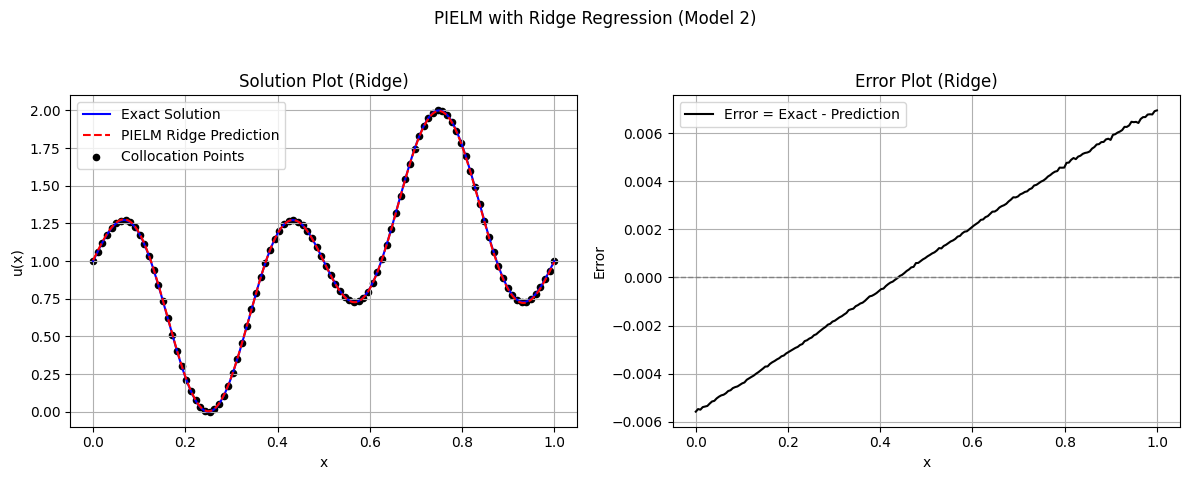

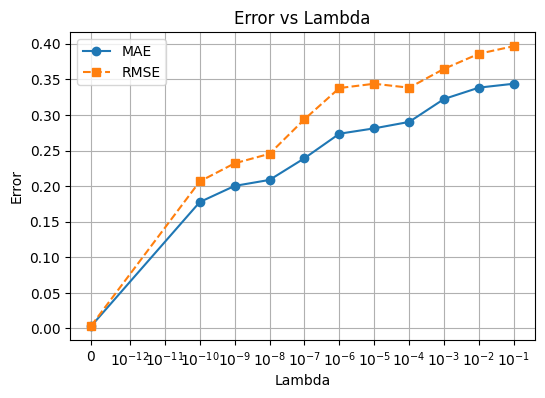

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Derivative of the tanh activation function.
    Required for enforcing the differential equation at collocation points.
    """
    return 1 - np.tanh(z)**2

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(2 * np.pi * x) * np.cos(4 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u'(x) = f(x).
    This function represents f(x) and is derived from the exact solution.
    """
    term1 = 2 * np.pi * np.cos(2 * np.pi * x) * np.cos(4 * np.pi * x)
    term2 = -4 * np.pi * np.sin(2 * np.pi * x) * np.sin(4 * np.pi * x)
    return term1 + term2

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)

# Generate collocation points within the domain [0, 1] where the DE must be satisfied
x_collocation = np.linspace(0, 1, 100).reshape(-1, 1)

# Define the boundary points of the domain
x_boundary = np.array([[0.0], [1.0]])

# Get the number of collocation and boundary points
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]

# The total number of neurons in the hidden layer is the sum of all points
N_neurons = N_collocation + N_boundary
d = 1 # Input dimension (1 for a 1D problem)

# Initialize the weights (W) and biases (b) for the single hidden layer
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Calculate the components of the linear system from the collocation points
Z_col = x_collocation @ W + b
H_col = activation_derivative(Z_col) * W
R_col = rhs_function(x_collocation).reshape(-1)

# Calculate the components of the linear system from the boundary conditions
Z_bc = x_boundary @ W + b
H_bc = activation(Z_bc)
R_bc = exact_solution(x_boundary).reshape(-1)

# Combine matrices and vectors to form the full system H * C = K
H_total = np.vstack((H_col, H_bc))
K_total = np.concatenate((R_col, R_bc))

# Prepare the test data for prediction and evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of regularization parameters (lambda) for Ridge Regression
# Includes lambda=0 (standard pseudo-inverse) and log-spaced values
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
mae_list = []
rmse_list = []
C_list = [] # Store the output weights C for each lambda

# Loop through each lambda to find the best regularization parameter
for lam in lambdas:
    # For lambda = 0, use the standard Moore-Penrose pseudoinverse
    if lam == 0:
        C_ridge = np.linalg.pinv(H_total) @ K_total
    # For lambda > 0, apply Ridge Regression to solve for the output weights C
    else:
        # This is a numerically stable way to compute C = H.T * inv(H * H.T + lambda*I) * K
        temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
        C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

    # Store the calculated weights for this lambda
    C_list.append(C_ridge)

    # Make predictions and calculate errors for the current lambda
    u_pred = H_test @ C_ridge
    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

    # Append errors to their respective lists
    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best lambda based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_lambda = lambdas[best_index]
best_C = C_list[best_index]

# Generate the final prediction and error using the best model
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time and calculate total duration
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Comparison of Exact and Predicted Solutions for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Ridge Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error Plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM with Ridge Regression (Model 2)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the regularization parameter and model error
plt.figure(figsize=(6, 4))
plt.plot(lambdas, mae_list, 'o-', label='MAE')
plt.plot(lambdas, rmse_list, 's--', label='RMSE')
plt.xscale('symlog', linthresh=1e-12) # Use a symmetric log scale for the x-axis
plt.title('Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 590
Mean Absolute Error (MAE): 3.771817e-05
Root Mean Square Error (RMSE): 5.507299e-05
CPU Time (Tcpu): 1.185880e+01 seconds


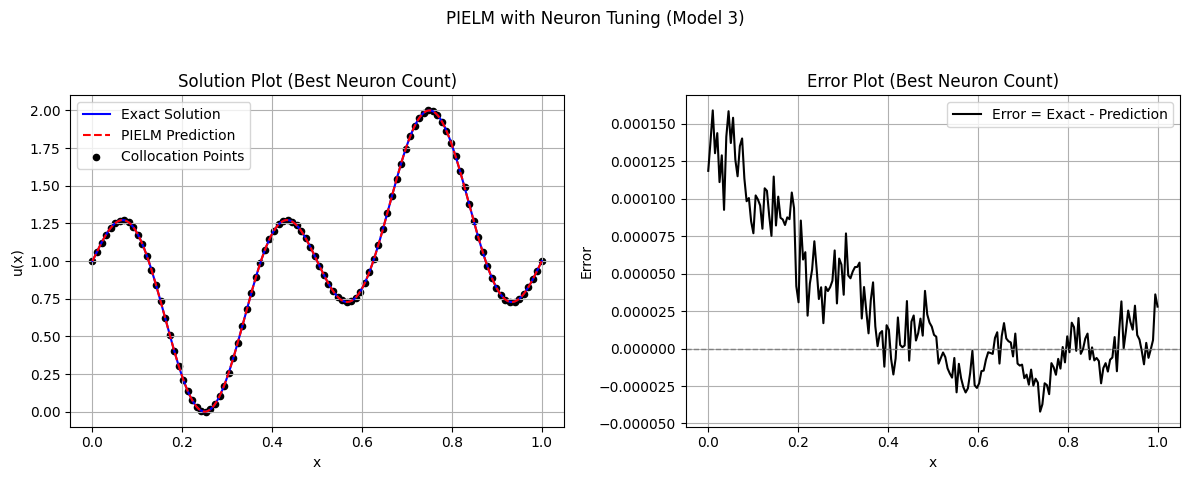

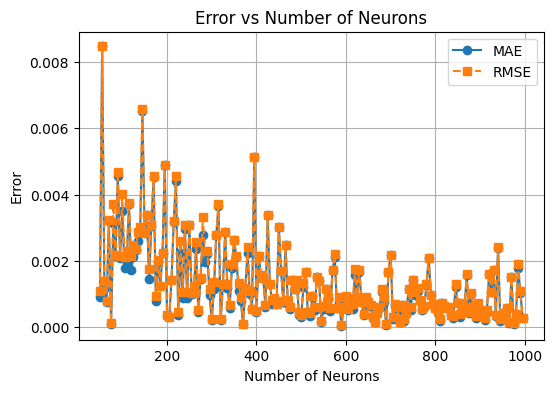

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Derivative of the tanh activation function.
    Required for enforcing the differential equation at collocation points.
    """
    return 1 - np.tanh(z)**2

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(2 * np.pi * x) * np.cos(4 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u'(x) = f(x).
    This function represents f(x) and is derived from the exact solution.
    """
    term1 = 2 * np.pi * np.cos(2 * np.pi * x) * np.cos(4 * np.pi * x)
    term2 = -4 * np.pi * np.sin(2 * np.pi * x) * np.sin(4 * np.pi * x)
    return term1 + term2

# Set a global seed for reproducibility
np.random.seed(0)

# Start measuring CPU time for the entire process
start_time = time.process_time()

# Define collocation and boundary points
x_collocation = np.linspace(0, 1, 100).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])

# Get the number of points and the input dimension
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1

# Prepare the test data for prediction and evaluation
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of neuron counts to test for the hidden layer
neuron_range = range(50, 1000, 5)

# Initialize lists to store results for each neuron count
mae_list = []
rmse_list = []
C_list = []
neuron_list = []

# Loop through each neuron count to find the optimal network size
for N_neurons in neuron_range:
    # Reset the seed in each loop iteration for consistent weight initialization
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix H and vector K for the current network size
    Z_col = x_collocation @ W + b
    H_col = activation_derivative(Z_col) * W
    R_col = rhs_function(x_collocation).reshape(-1)

    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(x_boundary).reshape(-1)

    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Solve for the output weights C using the Moore-Penrose pseudoinverse
    C = np.linalg.pinv(H_total) @ K_total

    # Store the results for the current network size
    C_list.append(C)
    neuron_list.append(N_neurons)

    # Make predictions and calculate errors on the test set
    Z_test = x_test @ W + b
    H_test = activation(Z_test)
    u_pred = H_test @ C

    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best number of neurons based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_N = neuron_list[best_index]
best_C = C_list[best_index]

# Re-initialize the best network to generate the final prediction for plotting
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, best_N))
b = np.random.uniform(-1, 1, (1, best_N))
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Number of Neurons: {best_N}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM with Neuron Tuning (Model 3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the number of neurons and model error
plt.figure(figsize=(6,4))
plt.plot(neuron_list, mae_list, 'o-', label='MAE')
plt.plot(neuron_list, rmse_list, 's--', label='RMSE')
plt.title('Error vs Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 590
Best Lambda: 0.00e+00
Mean Absolute Error (MAE): 3.771817e-05
Root Mean Square Error (RMSE): 5.507299e-05
CPU Time (Tcpu): 4.230004e+01 seconds


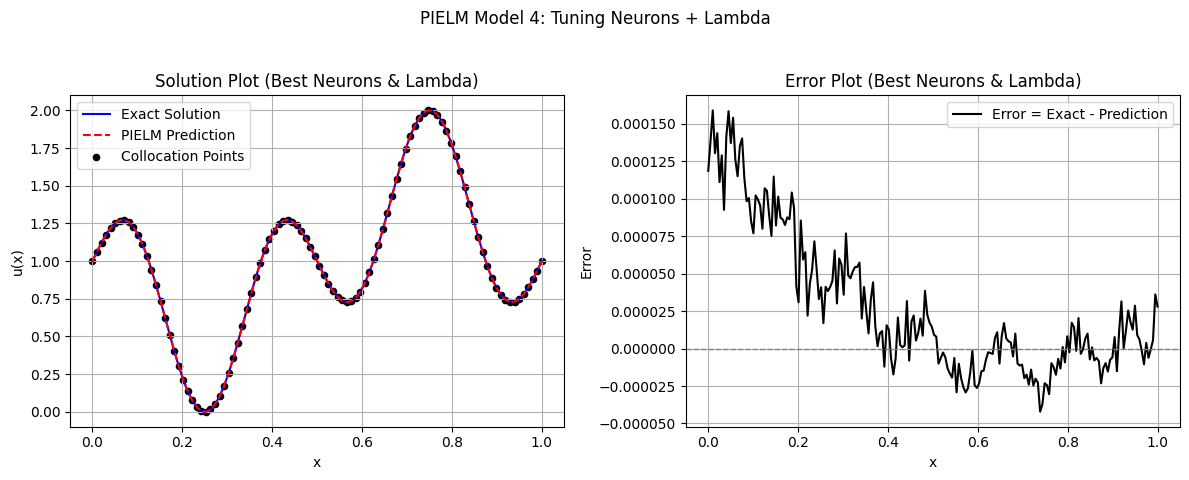

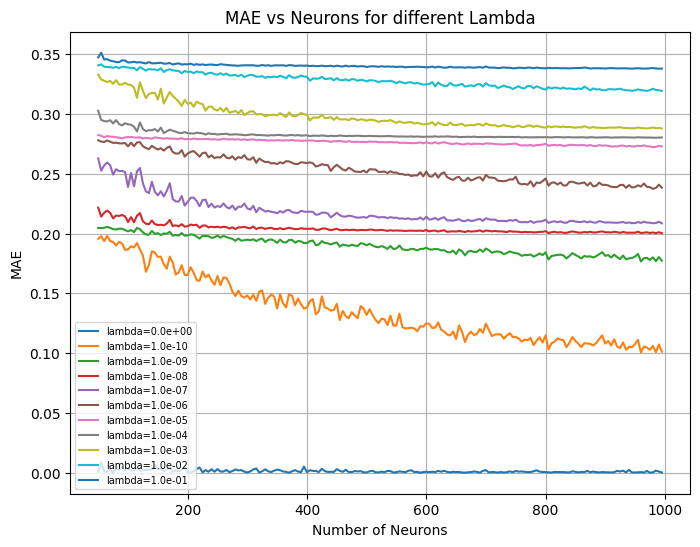

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Derivative of the tanh activation function.
    Required for enforcing the differential equation at collocation points.
    """
    return 1 - np.tanh(z)**2

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(2 * np.pi * x) * np.cos(4 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u'(x) = f(x).
    This function represents f(x) and is derived from the exact solution.
    """
    term1 = 2 * np.pi * np.cos(2 * np.pi * x) * np.cos(4 * np.pi * x)
    term2 = -4 * np.pi * np.sin(2 * np.pi * x) * np.sin(4 * np.pi * x)
    return term1 + term2

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)

# Define domain, boundary, and test points
x_collocation = np.linspace(0, 1, 100).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define problem dimensions and point counts
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1

# Define hyperparameter search space
neuron_range = range(50, 1000, 5) # Range of neuron counts to test
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10))) # Range of regularization parameters

# List to store results from the grid search
results = []

# Outer loop: iterate through the number of neurons
for N_neurons in neuron_range:
    # Reset seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix H and vector K once for each network size
    Z_col = x_collocation @ W + b
    H_col = activation_derivative(Z_col) * W
    R_col = rhs_function(x_collocation).reshape(-1)

    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(x_boundary).reshape(-1)

    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Inner loop: iterate through regularization parameters
    for lam in lambdas:
        # For lambda = 0, use the standard Moore-Penrose pseudoinverse
        if lam == 0:
            C_ridge = np.linalg.pinv(H_total) @ K_total
        # For lambda > 0, apply Ridge Regression
        else:
            temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
            C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

        # Make predictions and calculate errors for the current hyperparameter combination
        Z_test = x_test @ W + b
        H_test = activation(Z_test)
        u_pred = H_test @ C_ridge
        abs_error = np.abs(u_exact - u_pred)
        mae = np.mean(abs_error)
        rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

        # Store all results and parameters in a dictionary
        results.append({
            'neurons': N_neurons,
            'lambda': lam,
            'mae': mae,
            'rmse': rmse,
            'C': C_ridge, # Output weights
            'W': W,       # Hidden layer weights
            'b': b        # Hidden layer biases
        })

# Find the best result by searching for the minimum MAE in the results list
best_result = min(results, key=lambda x: x['mae'])

# Extract the parameters and metrics from the best performing model
best_N = best_result['neurons']
best_lambda = best_result['lambda']
best_C = best_result['C']
W = best_result['W']
b = best_result['b']

# Generate the final prediction using the best model's parameters
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the optimal hyperparameters and corresponding errors
print(f"Best Number of Neurons: {best_N}")
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {best_result['mae']:.6e}")
print(f"Root Mean Square Error (RMSE): {best_result['rmse']:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM Model 4: Tuning Neurons + Lambda')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Convert the results list to a pandas DataFrame for easier analysis and plotting
df = pd.DataFrame(results)

# Plot MAE vs. Number of Neurons for each value of lambda
plt.figure(figsize=(8,6))
for lam in lambdas:
    subset = df[df['lambda'] == lam]
    plt.plot(subset['neurons'], subset['mae'], label=f'lambda={lam:.1e}')

plt.title('MAE vs Neurons for different Lambda')
plt.xlabel('Number of Neurons')
plt.ylabel('MAE')
plt.legend(fontsize=7)
plt.grid(True)
plt.show()

## PDE for TC-2 (1D Steady Linear Diffusion)

The governing PDE is:

$$
\frac{d^2 u}{dx^2} = R
$$

Where the right-hand side \(R\) is:

$$
R = \frac{d^2}{dx^2} \left( \sin\left( \frac{\pi x}{2} \right) \cdot \cos(2\pi x) + 1 \right)
$$

---

### Exact Solution:

$$
u(x) = \sin\left( \frac{\pi x}{2} \right) \cdot \cos(2\pi x) + 1
$$

---

### Boundary Conditions:

- Dirichlet boundary conditions:

$$
u(0) = 1
$$

$$
u(1) = 1
$$

---

### Domain:

$$
x \in [0, 1]
$$


Condition number of H^T H: 4.49e+20
Mean Absolute Error (MAE): 2.779467e-01
Root Mean Square Error (RMSE): 3.707205e-01
CPU Time (Tcpu): 6.662256e-02 seconds


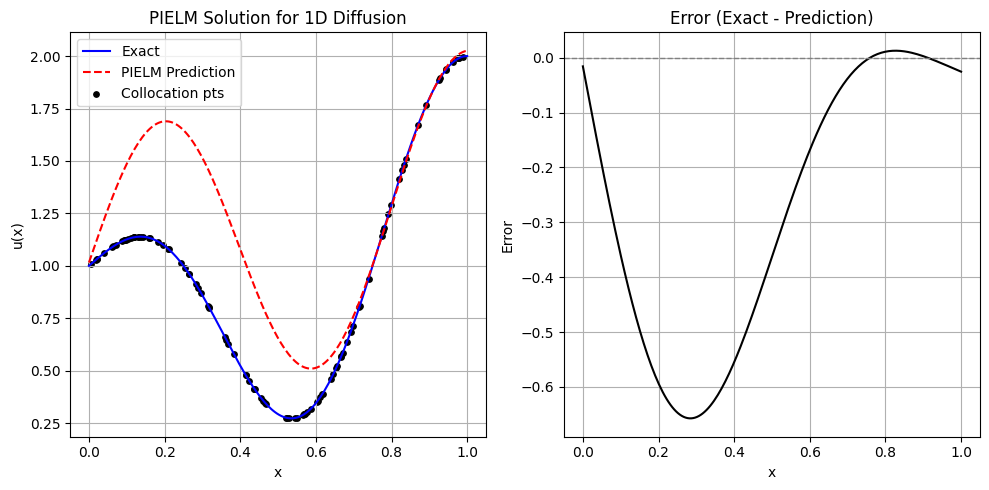

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_second_derivative(z):
    """
    Second derivative of the tanh activation function.
    Required for enforcing a second-order differential equation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2)

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(np.pi * x / 2) * np.cos(2 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u''(x) = f(x).
    This function represents f(x) and is the second derivative of the exact solution.
    """
    pi = np.pi
    term1 = - (pi/2)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term2 = - (2 * pi)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term3 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    term4 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    R = term1 + term2 + term3 + term4
    return R

# Start measuring CPU time
start_time = time.process_time()

# Define the number of points for the problem
Nf = 100         # Number of collocation (field) points
Nbc = 2          # Number of boundary condition points
N_neurons = 102  # Total number of neurons, typically Nf + Nbc

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)
# Generate random collocation points within the domain [0, 1]
x_col = np.random.uniform(0, 1, (Nf, 1))

# Define the fixed boundary points
x_bc = np.array([[0.0], [1.0]])

# Initialize the weights (W) and biases (b) for the single hidden layer
np.random.seed(0)
W = np.random.uniform(-1, 1, (1, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Part 1: Enforce the differential equation at collocation points
Z_col = x_col @ W + b
# Construct the system matrix using the second derivative of the activation function
H_col = activation_second_derivative(Z_col) * (W**2)
# Get the target values from the RHS of the DE at each collocation point
R_col = rhs_function(x_col).reshape(-1)

# Part 2: Enforce the boundary conditions
Z_bc = x_bc @ W + b
# Construct the system matrix for the boundary using the activation function itself
H_bc = activation(Z_bc)
# Get the target values from the exact solution at each boundary point
R_bc = exact_solution(x_bc).reshape(-1)

# Combine matrices and vectors to form the full system H * C = K
H_total = np.vstack((H_col, H_bc))
K_total = np.concatenate((R_col, R_bc))

# Calculate the condition number to check for numerical stability
cond_number = np.linalg.cond(H_total.T @ H_total)
print(f"Condition number of H^T H: {cond_number:.2e}")

# Solve for the output weights 'C' using the Moore-Penrose pseudoinverse
C = np.linalg.pinv(H_total) @ K_total

# Prepare a dense set of test points for smooth plotting and evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)

# Propagate the test points through the hidden layer
Z_test = x_test @ W + b
H_test = activation(Z_test)

# Predict the solution using the calculated output weights C
u_pred = H_test @ C

# Get the exact solution for comparison
u_exact = exact_solution(x_test).reshape(-1)

# Calculate error metrics
abs_error = np.abs(u_exact - u_pred)
mae = np.mean(abs_error)
rmse = np.sqrt(np.mean((u_exact - u_pred)**2))

# Stop measuring CPU time and calculate total duration
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the final error metrics and CPU time
print(f"Mean Absolute Error (MAE): {mae:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the results
plt.figure(figsize=(10, 5))

# Subplot 1: Comparison of Exact and Predicted Solutions
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_col, exact_solution(x_col), color='black', s=15, label='Collocation pts')
plt.title('PIELM Solution for 1D Diffusion')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error Plot
plt.subplot(1, 2, 2)
plt.plot(x_test, u_exact - u_pred, 'k-')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()

Best Lambda: 1.00e-10
Mean Absolute Error (MAE): 1.035799e-05
Root Mean Square Error (RMSE): 1.252723e-05
CPU Time (Tcpu): 2.094405e-02 seconds


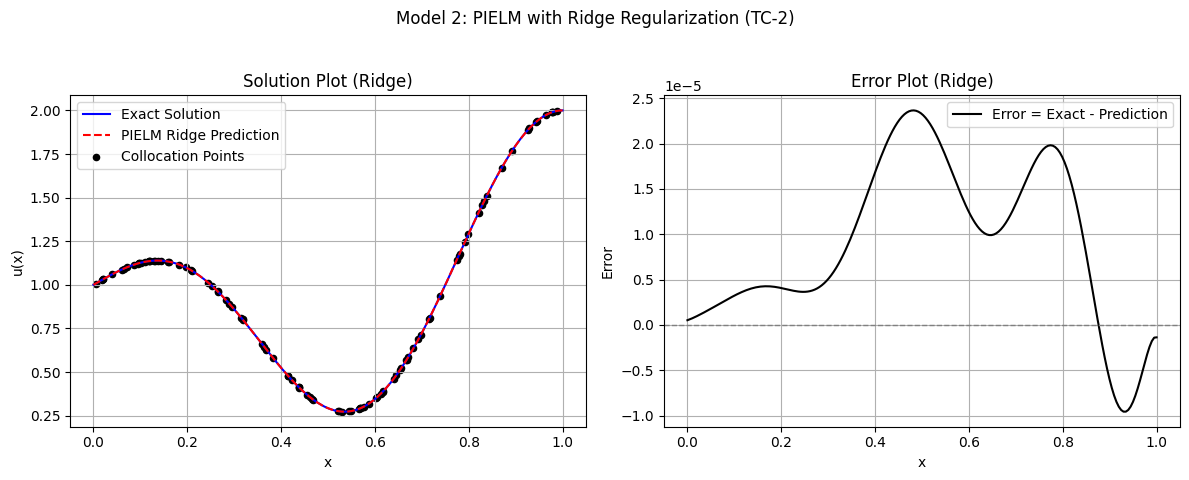

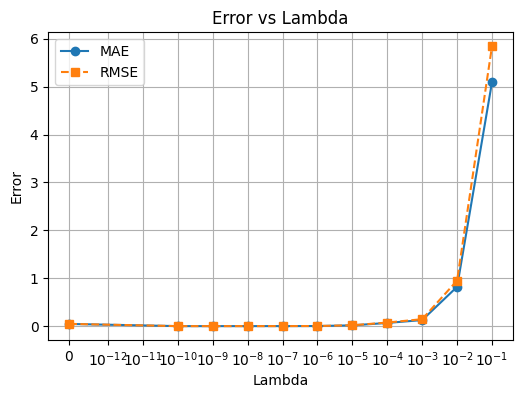

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_second_derivative(z):
    """
    Second derivative of the tanh activation function.
    Required for enforcing a second-order differential equation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2)

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(np.pi * x / 2) * np.cos(2 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u''(x) = f(x).
    This function represents f(x) and is the second derivative of the exact solution.
    """
    pi = np.pi
    term1 = - (pi/2)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term2 = - (2 * pi)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term3 = - 2 * pi**2 * np.cos(pi * x / 2) * np.sin(2 * pi * x)
    return term1 + term2 + term3

# Start measuring CPU time
start_time = time.process_time()

# Define the number of points and neurons for the problem
N_collocation = 100
N_boundary = 2
N_neurons = N_collocation + N_boundary
d = 1 # Input dimension (1 for a 1D problem)

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)
# Generate random collocation points within the domain [0, 1]
x_collocation = np.random.uniform(0, 1, (N_collocation, 1))
# Define the fixed boundary points
x_boundary = np.array([[0.0], [1.0]])

# Initialize the weights (W) and biases (b) for the single hidden layer
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the components of the linear system
# For collocation points, use the second derivative of the activation function
Z_col = x_collocation @ W + b
H_col = activation_second_derivative(Z_col) * (W ** 2)
R_col = rhs_function(x_collocation).reshape(-1)

# For boundary points, use the activation function itself
Z_bc = x_boundary @ W + b
H_bc = activation(Z_bc)
R_bc = exact_solution(x_boundary).reshape(-1)

# Combine matrices and vectors to form the full system H * C = K
H_total = np.vstack((H_col, H_bc))
K_total = np.concatenate((R_col, R_bc))

# Prepare the test data for prediction and evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of regularization parameters (lambda) for Ridge Regression
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
# Initialize lists to store results
mae_list = []
rmse_list = []
C_list = []

# Loop through each lambda to find the best regularization parameter
for lam in lambdas:
    # For lambda = 0, use the standard Moore-Penrose pseudoinverse
    if lam == 0:
        C_ridge = np.linalg.pinv(H_total) @ K_total
    # For lambda > 0, apply Ridge Regression to solve for the output weights C
    else:
        temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
        C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

    # Store the calculated weights for this lambda
    C_list.append(C_ridge)

    # Make predictions and calculate errors for the current lambda
    u_pred = H_test @ C_ridge
    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))
    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best lambda based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_lambda = lambdas[best_index]
best_C = C_list[best_index]

# Generate the final prediction and error using the best model
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time and calculate total duration
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Comparison of Exact and Predicted Solutions for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Ridge Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error Plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('Model 2: PIELM with Ridge Regularization (TC-2)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the regularization parameter and model error
plt.figure(figsize=(6, 4))
plt.plot(lambdas, mae_list, 'o-', label='MAE')
plt.plot(lambdas, rmse_list, 's--', label='RMSE')
plt.xscale('symlog', linthresh=1e-12) # Use a symmetric log scale for the x-axis
plt.title('Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 135
Mean Absolute Error (MAE): 2.378471e-01
Root Mean Square Error (RMSE): 2.970071e-01
CPU Time (Tcpu): 9.113480e+00 seconds


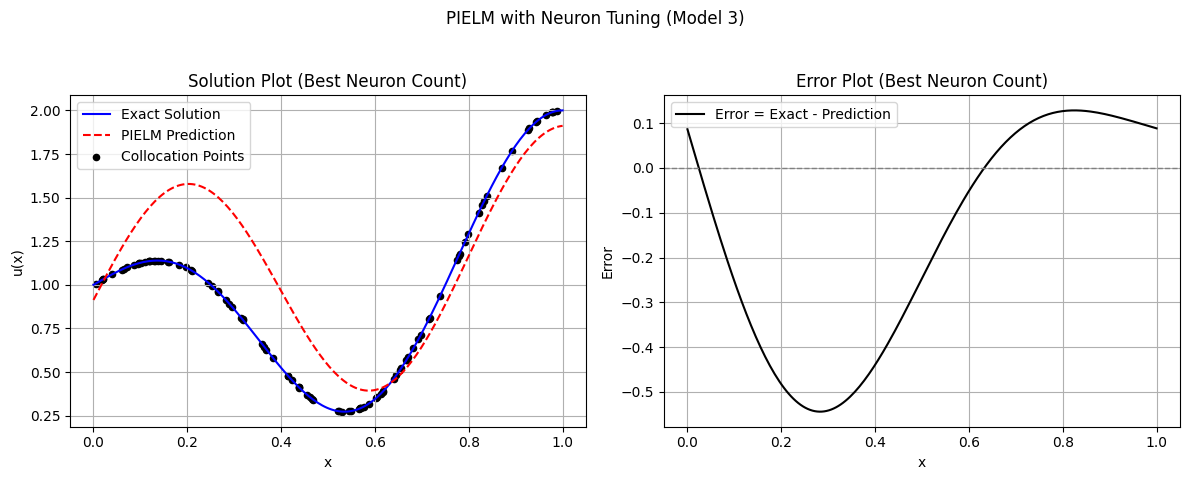

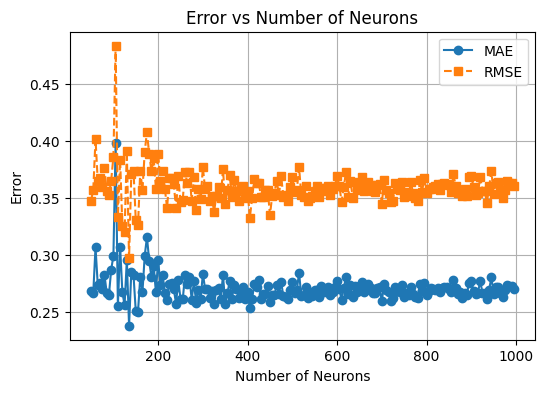

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    This function is used for the hidden layer of the neural network.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    NOTE: Despite its name, this function calculates the SECOND derivative
    of the tanh activation function, which is required for a second-order ODE.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2)

def exact_solution(x):
    """
    Defines the exact analytical solution to the differential equation.
    Used for setting boundary conditions and calculating the error.
    """
    return np.sin(np.pi * x / 2) * np.cos(2 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation u''(x) = f(x).
    This function represents f(x) and is the second derivative of the exact solution.
    """
    pi = np.pi
    term1 = - (pi/2)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term2 = - (2 * pi)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term3 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    term4 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    return term1 + term2 + term3 + term4

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation to ensure reproducibility
np.random.seed(0)

# Generate random collocation points and define fixed boundary points
x_collocation = np.random.uniform(0, 1, (100, 1))
x_boundary = np.array([[0.0], [1.0]])

# Get problem dimensions and point counts
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1

# Prepare the test data for evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of neuron counts to test for the hidden layer
neuron_range = range(50, 1000, 5)

# Initialize lists to store results for each neuron count
mae_list = []
rmse_list = []
C_list = []
neuron_list = []

# Loop through each neuron count to find the optimal network size
for N_neurons in neuron_range:
    # Reset the seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix using the second derivative for collocation points
    Z_col = x_collocation @ W + b
    H_col = activation_derivative(Z_col) * (W**2)
    R_col = rhs_function(x_collocation).reshape(-1)

    # Construct the system matrix for boundary conditions
    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(x_boundary).reshape(-1)

    # Combine matrices and vectors to form the full system H * C = K
    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Solve for the output weights C using the Moore-Penrose pseudoinverse
    C = np.linalg.pinv(H_total) @ K_total

    # Store the results for the current network size
    C_list.append(C)
    neuron_list.append(N_neurons)

    # Make predictions on the test set and calculate errors
    Z_test = x_test @ W + b
    H_test = activation(Z_test)
    u_pred = H_test @ C

    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best number of neurons based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_N = neuron_list[best_index]
best_C = C_list[best_index]

# Re-initialize the best network to generate the final prediction for plotting
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, best_N))
b = np.random.uniform(-1, 1, (1, best_N))
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Number of Neurons: {best_N}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM with Neuron Tuning (Model 3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the number of neurons and model error
plt.figure(figsize=(6,4))
plt.plot(neuron_list, mae_list, 'o-', label='MAE')
plt.plot(neuron_list, rmse_list, 's--', label='RMSE')
plt.title('Error vs Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 970
Best Lambda: 1.00e-02
Mean Absolute Error (MAE): 1.229052e-01
Root Mean Square Error (RMSE): 1.438148e-01
CPU Time (Tcpu): 4.407928e+01 seconds


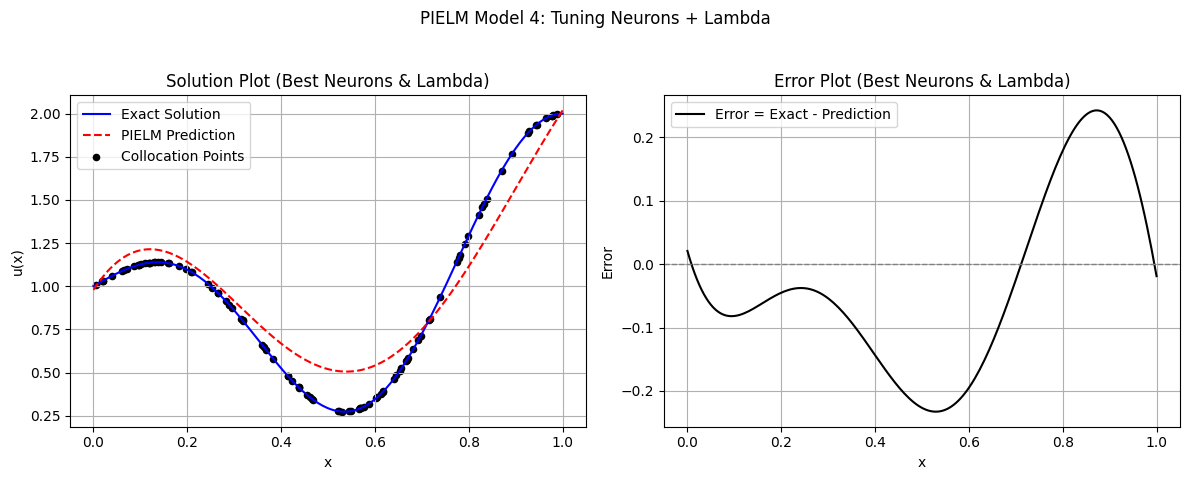

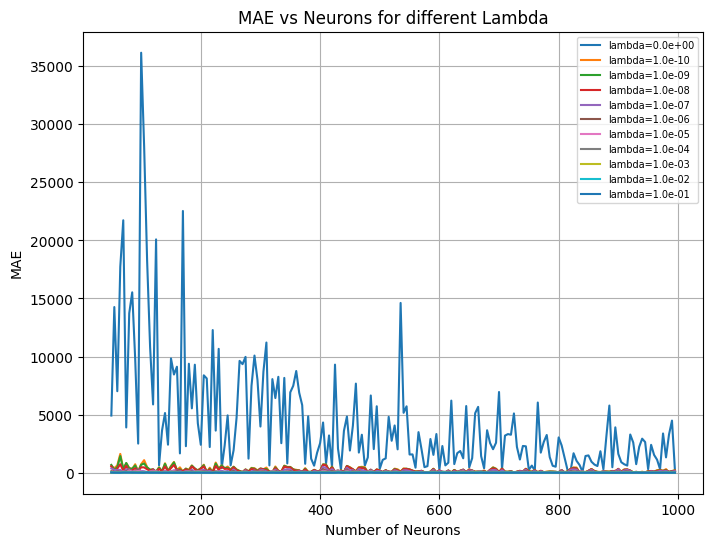

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Calculates the expression: -2 * tanh(z) * (1 - tanh(z)**2).
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2)

def exact_solution(x):
    """
    Defines the exact analytical solution for comparison.
    """
    return np.sin(np.pi * x / 2) * np.cos(2 * np.pi * x) + 1

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation being solved.
    """
    pi = np.pi
    term1 = - (pi/2)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term2 = - (2 * pi)**2 * np.sin(pi * x / 2) * np.cos(2 * pi * x)
    term3 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    term4 = - (pi) * np.cos(pi * x / 2) * (2 * pi) * np.sin(2 * pi * x)
    return term1 + term2 + term3 + term4

# Start measuring CPU time
start_time = time.process_time()
np.random.seed(0)

# Generate random collocation points and define fixed boundary points
x_collocation = np.random.uniform(0, 1, (100, 1))
x_boundary = np.array([[0.0], [1.0]])

# Get problem dimensions and point counts
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1

# Prepare the test data for evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define hyperparameter search space for neurons and lambda
neuron_range = range(50, 1000, 5)
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))

# List to store results from the grid search
results = []

# Outer loop: iterate through the number of neurons
for N_neurons in neuron_range:
    # Reset seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix for collocation points
    Z_col = x_collocation @ W + b
    H_col = activation_derivative(Z_col) * W
    R_col = rhs_function(x_collocation).reshape(-1)

    # Construct the system matrix for boundary conditions
    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(x_boundary).reshape(-1)

    # Combine matrices and vectors to form the full system
    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Inner loop: iterate through regularization parameters
    for lam in lambdas:
        # Solve for the output weights C using Ridge Regression
        if lam == 0:
            C_ridge = np.linalg.pinv(H_total) @ K_total
        else:
            temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
            C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

        # Append the calculated output weights to C_list
        C_list.append(C_ridge)

        # Make predictions and calculate errors
        Z_test = x_test @ W + b
        H_test = activation(Z_test)
        u_pred = H_test @ C_ridge
        abs_error = np.abs(u_exact - u_pred)
        mae = np.mean(abs_error)
        rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

        # Store all results and parameters in a dictionary
        results.append({
            'neurons': N_neurons,
            'lambda': lam,
            'mae': mae,
            'rmse': rmse,
            'C': C_ridge,
            'W': W,
            'b': b
        })

# Find the best result by searching for the minimum MAE
best_result = min(results, key=lambda x: x['mae'])

# Extract the parameters from the best performing model
best_N = best_result['neurons']
best_lambda = best_result['lambda']
best_C = best_result['C']
W = best_result['W']
b = best_result['b']

# Generate the final prediction using the best model's parameters
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the optimal hyperparameters and corresponding errors
print(f"Best Number of Neurons: {best_N}")
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {best_result['mae']:.6e}")
print(f"Root Mean Square Error (RMSE): {best_result['rmse']:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM Model 4: Tuning Neurons + Lambda')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Convert the results to a pandas DataFrame for easier analysis
df = pd.DataFrame(results)

# Plot MAE vs. Number of Neurons for each value of lambda
plt.figure(figsize=(8,6))
for lam in lambdas:
    subset = df[df['lambda'] == lam]
    plt.plot(subset['neurons'], subset['mae'], label=f'lambda={lam:.1e}')

plt.title('MAE vs Neurons for different Lambda')
plt.xlabel('Number of Neurons')
plt.ylabel('MAE')
plt.legend(fontsize=7)
plt.grid(True)
plt.show()

## PDE for TC-3 (1D Steady Linear Advection-Diffusion)

The governing PDE is:

$$
\frac{du}{dx} - \nu \frac{d^2 u}{dx^2} = 0, \quad x \in (0, 1)
$$

where:

- $\nu = 0.2$ (diffusion coefficient)

---

### Exact Solution:

$$
u(x) = \frac{e^{x / \nu} - 1}{e^{1 / \nu} - 1}
$$

---

### Boundary Conditions:

- Dirichlet Boundary Conditions:

$$
u(0) = 0
$$

$$
u(1) = 1
$$

---

### Domain:

$$
x \in [0, 1]
$$


Condition number of H^T H: 2.37e+19
Mean Absolute Error (MAE): 2.791762e-10
Root Mean Square Error (RMSE): 3.601748e-10
CPU Time (Tcpu): 5.487031e-03 seconds


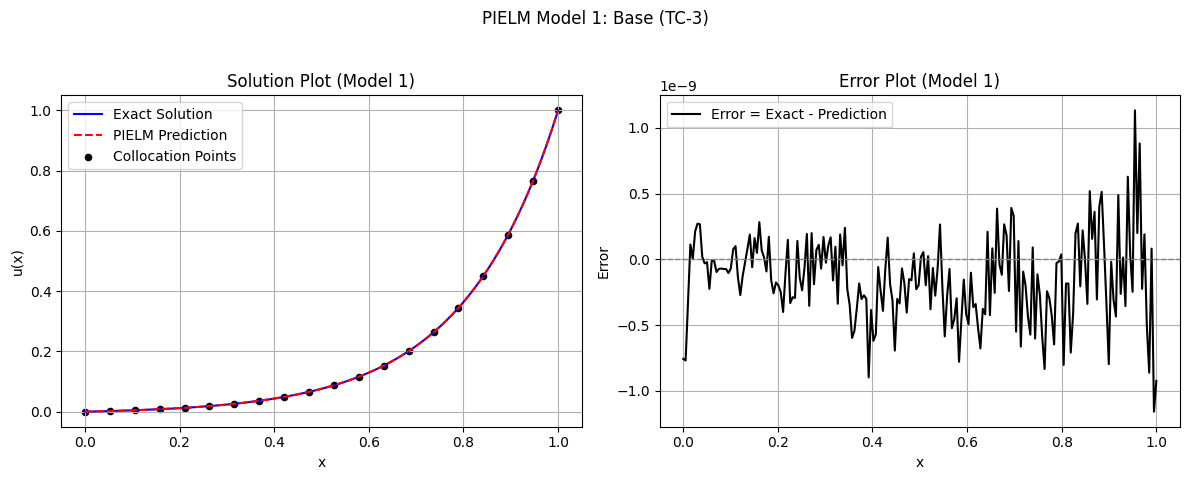

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Calculates the first derivative of the tanh activation function.
    """
    return 1 - np.tanh(z) ** 2

def activation_second_derivative(z):
    """
    Calculates the second derivative of the tanh activation function.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z) ** 2)

def exact_solution(x):
    """
    Defines the exact analytical solution for the convection-diffusion equation.
    """
    nu = 0.2
    return (np.exp(x / nu) - 1) / (np.exp(1 / nu) - 1)

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the homogeneous differential equation (returns zeros).
    """
    return np.zeros_like(x)

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation for reproducibility
np.random.seed(0)

# Generate evenly spaced collocation points and define boundary points
x_collocation = np.linspace(0, 1, 20).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])

# Define problem parameters
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
N_neurons = N_collocation + N_boundary
d = 1
nu = 0.2  # Viscosity or diffusion coefficient

# Initialize the weights (W) and biases (b) for the single hidden layer
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix for the collocation points
Z_col = x_collocation @ W + b
# Calculate the component for the first derivative term u'(x)
H_col_x = activation_derivative(Z_col) * W
# Calculate the component for the second derivative term u''(x)
H_col_xx = activation_second_derivative(Z_col) * (W ** 2)

# Combine components to form the full differential operator u' - nu * u''
H_col = H_col_x - nu * H_col_xx

# Get the target values (zeros) from the RHS of the DE
R_col = rhs_function(x_collocation).reshape(-1)

# Construct the system matrix for the boundary conditions
Z_bc = x_boundary @ W + b
H_bc = activation(Z_bc)
# Define the target values at the boundaries, u(0)=0 and u(1)=1
R_bc = np.array([0.0, 1.0])

# Assemble the full system matrix and target vector
H_total = np.vstack((H_col, H_bc))
K_total = np.concatenate((R_col, R_bc))

# Calculate the condition number of the matrix for stability analysis
cond_number = np.linalg.cond(H_total.T @ H_total)
print(f"Condition number of H^T H: {cond_number:.2e}")

# Solve for the output weights 'C' using the Moore-Penrose pseudoinverse
C = np.linalg.pinv(H_total) @ K_total

# Prepare a dense set of test points for smooth plotting and evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
Z_test = x_test @ W + b
H_test = activation(Z_test)

# Predict the solution using the calculated output weights C
u_pred = H_test @ C
# Get the exact solution for comparison
u_exact = exact_solution(x_test).reshape(-1)
# Calculate the pointwise error
error = u_exact - u_pred

# Calculate error metrics
abs_error = np.abs(error)
mae = np.mean(abs_error)
rmse = np.sqrt(np.mean(error ** 2))

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the final error metrics and CPU time
print(f"Mean Absolute Error (MAE): {mae:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Comparison of Exact and Predicted Solutions
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Model 1)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error Plot
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Model 1)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM Model 1: Base (TC-3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Best Lambda: 0.00e+00
Mean Absolute Error (MAE): 2.791762e-10
Root Mean Square Error (RMSE): 3.601748e-10
CPU Time (Tcpu): 5.423242e-03 seconds


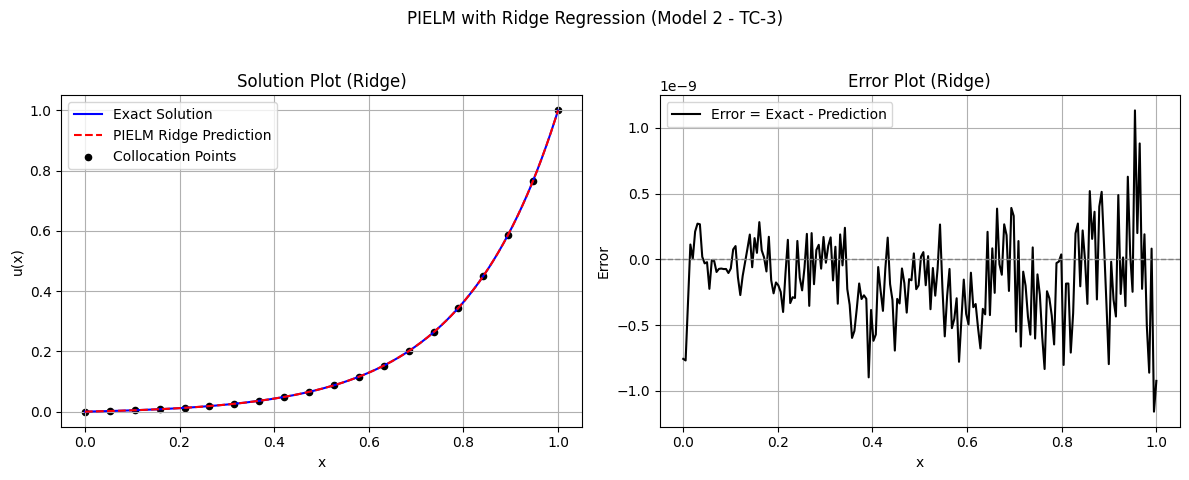

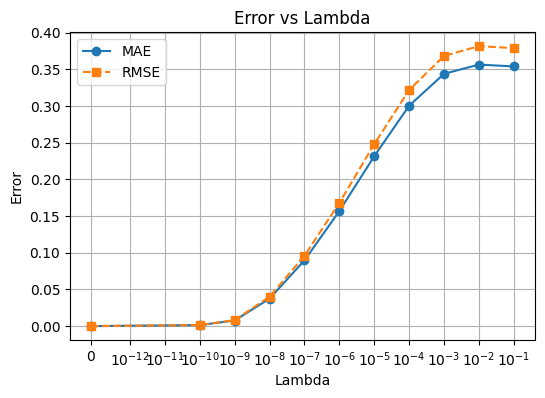

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Calculates the first derivative of the tanh activation function.
    """
    return 1 - np.tanh(z) ** 2

def activation_second_derivative(z):
    """
    Calculates the second derivative of the tanh activation function.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z) ** 2)

def exact_solution(x):
    """
    Defines the exact analytical solution for the convection-diffusion equation.
    """
    nu = 0.2
    return (np.exp(x / nu) - 1) / (np.exp(1 / nu) - 1)

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the homogeneous differential equation (returns zeros).
    """
    return np.zeros_like(x)

# Start measuring CPU time
start_time = time.process_time()

# Set a seed for random number generation for reproducibility
np.random.seed(0)
# Generate evenly spaced collocation points and define boundary points
x_collocation = np.linspace(0, 1, 20).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])

# Define problem parameters
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
N_neurons = N_collocation + N_boundary
d = 1
nu = 0.2  # Viscosity or diffusion coefficient

# Initialize the weights (W) and biases (b) for the single hidden layer
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix for the collocation points
Z_col = x_collocation @ W + b
H_col_x = activation_derivative(Z_col) * W
H_col_xx = activation_second_derivative(Z_col) * (W ** 2)
# Combine components to form the full differential operator u' - nu * u''
H_col = H_col_x - nu * H_col_xx
R_col = rhs_function(x_collocation).reshape(-1)

# Construct the system matrix for the boundary conditions
Z_bc = x_boundary @ W + b
H_bc = activation(Z_bc)
R_bc = np.array([0.0, 1.0])

# Assemble the full system matrix and target vector
H_total = np.vstack((H_col, H_bc))
K_total = np.concatenate((R_col, R_bc))

# Prepare the test data for evaluation
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of regularization parameters (lambda) for Ridge Regression
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
# Initialize lists to store results
mae_list = []
rmse_list = []
C_list = []

# Loop through each lambda to find the best regularization parameter
for lam in lambdas:
    # Solve for the output weights C using Ridge Regression
    if lam == 0:
        C_ridge = np.linalg.pinv(H_total) @ K_total
    else:
        temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
        C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

    # Store the calculated weights for this lambda
    C_list.append(C_ridge)

    # Make predictions and calculate errors for the current lambda
    u_pred = H_test @ C_ridge
    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))
    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best lambda based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_lambda = lambdas[best_index]
best_C = C_list[best_index]

# Generate the final prediction and error using the best model
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Ridge Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Ridge)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM with Ridge Regression (Model 2 - TC-3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the regularization parameter and model error
plt.figure(figsize=(6, 4))
plt.plot(lambdas, mae_list, 'o-', label='MAE')
plt.plot(lambdas, rmse_list, 's--', label='RMSE')
plt.xscale('symlog', linthresh=1e-12) # Use a symmetric log scale for the x-axis
plt.title('Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 765
Mean Absolute Error (MAE): 2.120082e-11
Root Mean Square Error (RMSE): 2.573438e-11
CPU Time (Tcpu): 4.033819e+00 seconds


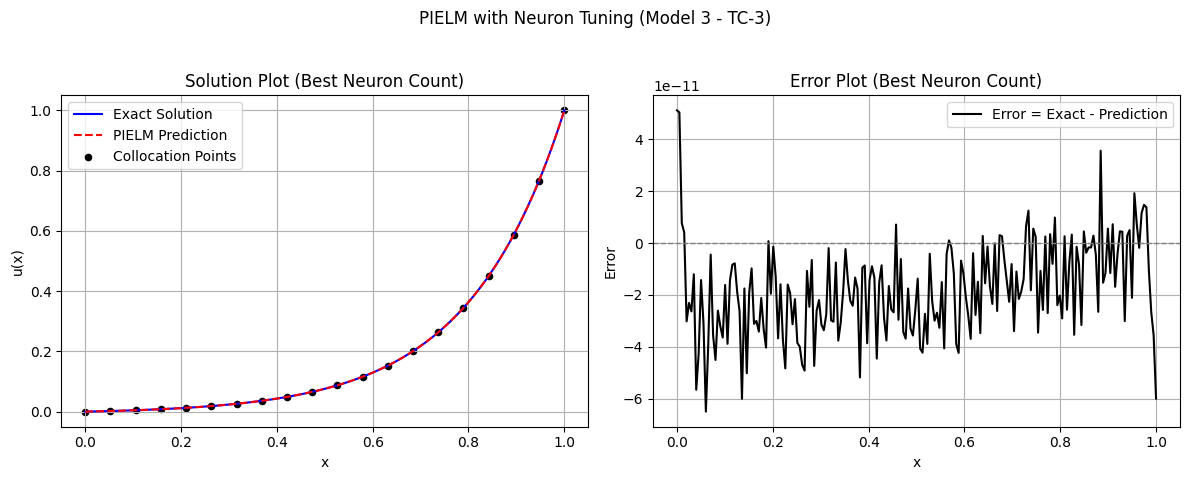

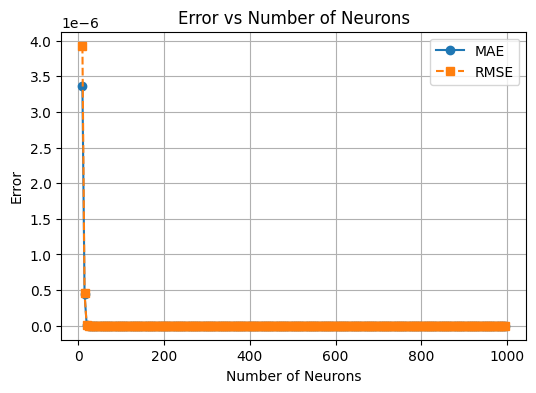

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Calculates the first derivative of the tanh activation function.
    """
    return 1 - np.tanh(z) ** 2

def activation_second_derivative(z):
    """
    Calculates the second derivative of the tanh activation function.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z) ** 2)

def exact_solution(x):
    """
    Defines the exact analytical solution for the convection-diffusion equation.
    """
    nu = 0.2
    return (np.exp(x / nu) - 1) / (np.exp(1 / nu) - 1)

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the homogeneous differential equation (returns zeros).
    """
    return np.zeros_like(x)

# Start measuring CPU time
start_time = time.process_time()
np.random.seed(0)

# Generate evenly spaced collocation points and define boundary points
x_collocation = np.linspace(0, 1, 20).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])

# Define problem parameters
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1
nu = 0.2  # Viscosity or diffusion coefficient

# Prepare the test data for evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define a range of neuron counts to test for the hidden layer
neuron_range = range(10, 1000, 5)

# Initialize lists to store results for each neuron count
mae_list = []
rmse_list = []
C_list = []
neuron_list = []

# Loop through each neuron count to find the optimal network size
for N_neurons in neuron_range:
    # Reset the seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix for the collocation points
    Z_col = x_collocation @ W + b
    H_col_x = activation_derivative(Z_col) * W
    H_col_xx = activation_second_derivative(Z_col) * (W ** 2)
    # Combine components to form the full differential operator u' - nu * u''
    H_col = H_col_x - nu * H_col_xx
    R_col = rhs_function(x_collocation).reshape(-1)

    # Construct the system matrix for boundary conditions
    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = np.array([0.0, 1.0])

    # Assemble the full system matrix and target vector
    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Solve for the output weights C using the Moore-Penrose pseudoinverse
    C = np.linalg.pinv(H_total) @ K_total

    # Store the results for the current network size
    C_list.append(C)
    neuron_list.append(N_neurons)

    # Make predictions on the test set and calculate errors
    Z_test = x_test @ W + b
    H_test = activation(Z_test)
    u_pred = H_test @ C

    abs_error = np.abs(u_exact - u_pred)
    mae = np.mean(abs_error)
    rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best number of neurons based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_N = neuron_list[best_index]
best_C = C_list[best_index]

# Re-initialize the best network to generate the final prediction for plotting
np.random.seed(0)
W = np.random.uniform(-1, 1, (d, best_N))
b = np.random.uniform(-1, 1, (1, best_N))
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the results for the best model
print(f"Best Number of Neurons: {best_N}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_xact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neuron Count)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM with Neuron Tuning (Model 3 - TC-3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the relationship between the number of neurons and model error
plt.figure(figsize=(6,4))
plt.plot(neuron_list, mae_list, 'o-', label='MAE')
plt.plot(neuron_list, rmse_list, 's--', label='RMSE')
plt.title('Error vs Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Best Number of Neurons: 30
Best Lambda: 1.00e-01
Mean Absolute Error (MAE): 3.595651e-01
Root Mean Square Error (RMSE): 3.848229e-01
CPU Time (Tcpu): 3.038898e+01 seconds


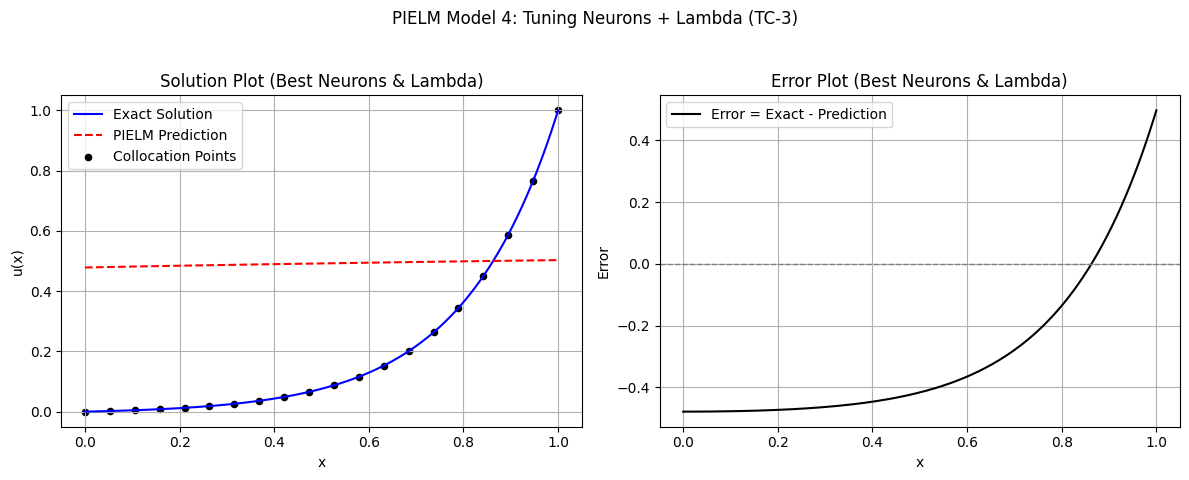

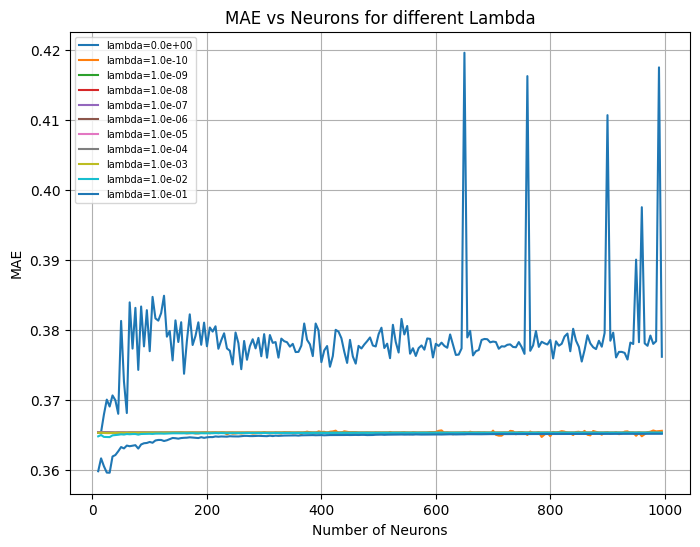

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_derivative(z):
    """
    Calculates the first derivative of the tanh activation function.
    """
    return 1 - np.tanh(z) ** 2

def activation_second_derivative(z):
    """
    Calculates the second derivative of the tanh activation function.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z) ** 2)

def exact_solution(x):
    """
    Defines the exact analytical solution for comparison.
    """
    nu = 0.2
    return (np.exp(x / nu) - 1) / (np.exp(1 / nu) - 1)

def rhs_function(x):
    """
    Right-Hand Side (RHS) of the differential equation being solved.
    """
    return np.zeros_like(x)

# Start measuring CPU time
start_time = time.process_time()
np.random.seed(0)

# Generate evenly spaced collocation points and define boundary points
x_collocation = np.linspace(0, 1, 20).reshape(-1, 1)
x_boundary = np.array([[0.0], [1.0]])

# Define problem parameters
N_collocation = x_collocation.shape[0]
N_boundary = x_boundary.shape[0]
d = 1
nu = 0.2

# Prepare the test data for evaluation
np.random.seed(0)
x_test = np.linspace(0, 1, 200).reshape(-1, 1)
u_exact = exact_solution(x_test).reshape(-1)

# Define hyperparameter search space for neurons and lambda
neuron_range = range(10, 1000, 5)
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))

# List to store results from the grid search
results = []

# Outer loop: iterate through the number of neurons
for N_neurons in neuron_range:
    # Reset seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (d, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix for collocation points
    Z_col = x_collocation @ W + b
    H_col = activation_derivative(Z_col) * W
    R_col = rhs_function(x_collocation).reshape(-1)

    # Construct the system matrix for boundary conditions
    Z_bc = x_boundary @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(x_boundary).reshape(-1)

    # Combine matrices and vectors to form the full system
    H_total = np.vstack((H_col, H_bc))
    K_total = np.concatenate((R_col, R_bc))

    # Inner loop: iterate through regularization parameters
    for lam in lambdas:
        # Solve for the output weights C using Ridge Regression
        if lam == 0:
            C_ridge = np.linalg.pinv(H_total) @ K_total
        else:
            temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
            C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

        # Append the calculated output weights to C_list
        C_list.append(C_ridge)

        # Make predictions and calculate errors
        Z_test = x_test @ W + b
        H_test = activation(Z_test)
        u_pred = H_test @ C_ridge
        abs_error = np.abs(u_exact - u_pred)
        mae = np.mean(abs_error)
        rmse = np.sqrt(np.mean((u_exact - u_pred) ** 2))

        # Store all results and parameters in a dictionary
        results.append({
            'neurons': N_neurons,
            'lambda': lam,
            'mae': mae,
            'rmse': rmse,
            'C': C_ridge,
            'W': W,
            'b': b
        })

# Find the best result by searching for the minimum MAE
best_result = min(results, key=lambda x: x['mae'])

# Extract the parameters from the best performing model
best_N = best_result['neurons']
best_lambda = best_result['lambda']
best_C = best_result['C']
W = best_result['W']
b = best_result['b']

# Generate the final prediction using the best model's parameters
Z_test = x_test @ W + b
H_test = activation(Z_test)
u_pred = H_test @ best_C
error = u_exact - u_pred

# Stop measuring CPU time
end_time = time.process_time()
Tcpu = end_time - start_time

# Print the optimal hyperparameters and corresponding errors
print(f"Best Number of Neurons: {best_N}")
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {best_result['mae']:.6e}")
print(f"Root Mean Square Error (RMSE): {best_result['rmse']:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Subplot 1: Solution plot for the best model
plt.subplot(1, 2, 1)
plt.plot(x_test, u_exact, 'b-', label='Exact Solution')
plt.plot(x_test, u_pred, 'r--', label='PIELM Prediction')
plt.scatter(x_collocation, exact_solution(x_collocation), color='black', s=20, label='Collocation Points')
plt.title('Solution Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.plot(x_test, error, 'k-', label='Error = Exact - Prediction')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Error Plot (Best Neurons & Lambda)')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.suptitle('PIELM Model 4: Tuning Neurons + Lambda (TC-3)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Convert the results to a pandas DataFrame for easier analysis
df = pd.DataFrame(results)

# Plot MAE vs. Number of Neurons for each value of lambda
plt.figure(figsize=(8,6))
for lam in lambdas:
    subset = df[df['lambda'] == lam]
    plt.plot(subset['neurons'], subset['mae'], label=f'lambda={lam:.1e}')

plt.title('MAE vs Neurons for different Lambda')
plt.xlabel('Number of Neurons')
plt.ylabel('MAE')
plt.legend(fontsize=7)
plt.grid(True)
plt.show()

## Test Case 4 (TC-4): 2D Steady Linear Advection in a Star-Shaped Domain (Ω₁)

---

### Partial Differential Equation (PDE):

∂u/∂x + 0.5·∂u/∂y = R(x, y)   on Ω₁

---

### Exact Solution (used to derive R):

u(x, y) = 0.5 · cos(πx) · sin(πy)

---

### Domain Ω₁:

- A regular 6-pointed star (hexagram)

---

### Boundary Condition (Dirichlet):

u(x, y) = 0.5 · cos(πx) · sin(πy)   on ∂Ω₁

(Exact solution applied directly on the boundary)

---

### Right-Hand Side (RHS) — Corrected:

R(x, y) =
-0.5·π·sin(πx)·sin(πy) + 0.25·π·cos(πx)·cos(πy)

---

### Collocation and Boundary Points (from paper):

- N_f = 921  → interior collocation points (enforce PDE)
- N_bc = 240 → boundary condition points


Condition number of H^T H: 1.23e+22
Mean Absolute Error (MAE): 1.166944e-03
Root Mean Square Error (RMSE): 1.315658e-03
CPU Time (Tcpu): 2.792402e+01 seconds


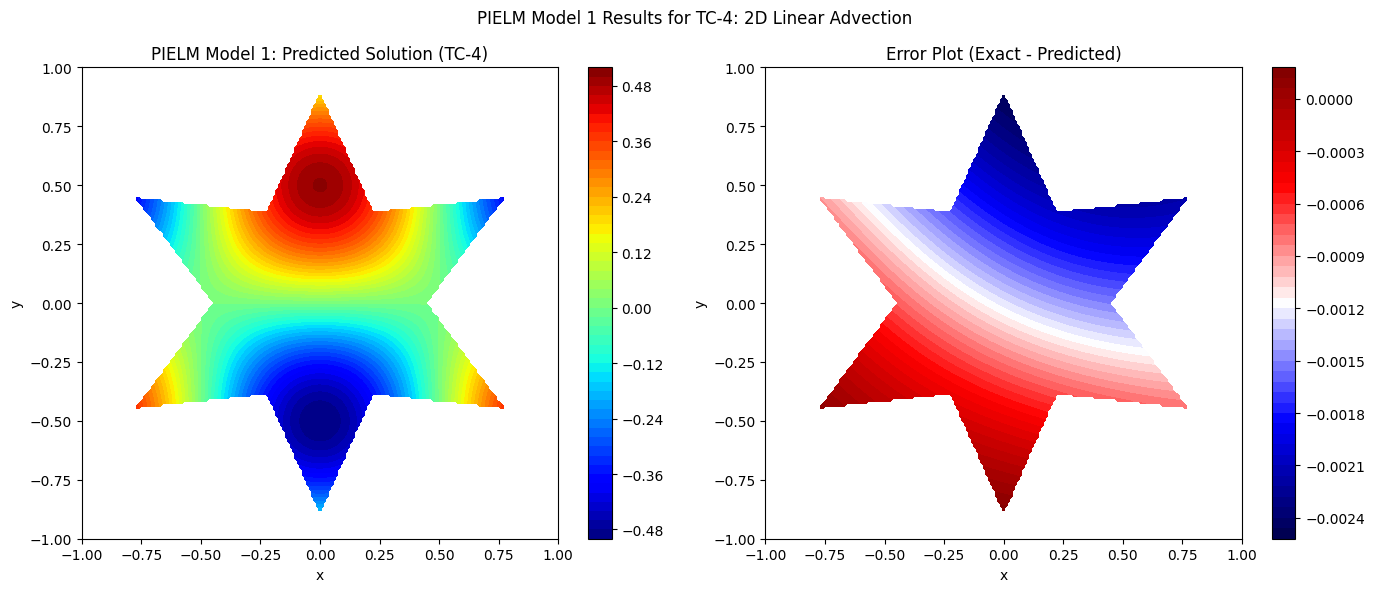

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_dx(z, w):
    """
    Calculates the partial derivative of the activation with respect to x.
    """
    return (1 - np.tanh(z)**2) * w[0]

def activation_dy(z, w):
    """
    Calculates the partial derivative of the activation with respect to y.
    """
    return (1 - np.tanh(z)**2) * w[1]

def exact_solution(x, y):
    """
    Defines the exact analytical solution for the 2D PDE.
    """
    return 0.5 * np.cos(np.pi * x) * np.sin(np.pi * y)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the PDE: u_x + 0.5 * u_y = f(x, y).
    """
    return -0.5 * np.pi * np.sin(np.pi * x) * np.sin(np.pi * y) + \
           0.25 * np.pi * np.cos(np.pi * x) * np.cos(np.pi * y)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6  # Rotate to align tips with axes
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])  # Close the polygon loop
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time
start_time = time.process_time()
np.random.seed(0)

# Define the number of points and neurons
N_points = 921
N_bc = 240
N_neurons = 2000

# Generate random points in a square and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1  # Sample in [-1, 1]^2
mask = inside_star(xy[:, 0], xy[:, 1])
xy_domain = xy[mask][:N_points]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]  # Exclude the closing point for interpolation
xy_boundary = interpolate_boundary(xy_boundary_raw, N_bc)

# Set up collocation (field) points and boundary condition points
X_f = xy_domain
X_bc = xy_boundary

# Initialize network weights and biases for 2D input
d = 2
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix for the collocation points
Z_f = X_f @ W + b
# Calculate the component for the partial derivative u_x
H_fx = np.array([activation_dx(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
# Calculate the component for the partial derivative u_y
H_fy = np.array([activation_dy(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
# Combine components to form the full PDE operator u_x + 0.5 * u_y
H_f = H_fx + 0.5 * H_fy
# Get the target values from the RHS of the PDE
R_f = rhs_function(X_f[:, 0], X_f[:, 1])

# Construct the system matrix for the boundary conditions
Z_bc = X_bc @ W + b
H_bc = activation(Z_bc)
# Get the target values from the exact solution on the boundary (Dirichlet condition)
R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

# Assemble the full system matrix and target vector
H_total = np.vstack((H_f, H_bc))
K_total = np.concatenate((R_f, R_bc))

# Calculate the condition number for stability analysis
cond_number = np.linalg.cond(H_total.T @ H_total)
print(f"Condition number of H^T H: {cond_number:.2e}")

# Solve for the output weights 'C' using the Moore-Penrose pseudoinverse
C = np.linalg.pinv(H_total) @ K_total

# Create a grid of points for plotting the final solution
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)

# Predict the solution over the entire grid
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = Hg @ C
u_pred = u_pred.reshape(200, 200)

# Calculate the exact solution over the grid for comparison
u_exact = exact_solution(Xg, Yg)

# Mask out points outside the star domain for visualization
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)
u_pred[~domain_mask] = np.nan
u_exact[~domain_mask] = np.nan

# Calculate error metrics, ignoring the masked-out (NaN) values
error = u_exact - u_pred
mae = np.nanmean(np.abs(error))
rmse = np.sqrt(np.nanmean(error**2))
Tcpu = time.process_time() - start_time

# Print the final error metrics and CPU time
print(f"Mean Absolute Error (MAE): {mae:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 1: Predicted Solution (TC-4)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Predicted)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 1 Results for TC-4: 2D Linear Advection')
plt.tight_layout()
plt.show()

Best Lambda: 1.00e-10
Mean Absolute Error (MAE): 5.858464e-07
Root Mean Square Error (RMSE): 7.243336e-07
CPU Time (Tcpu): 8.995836e+00 seconds


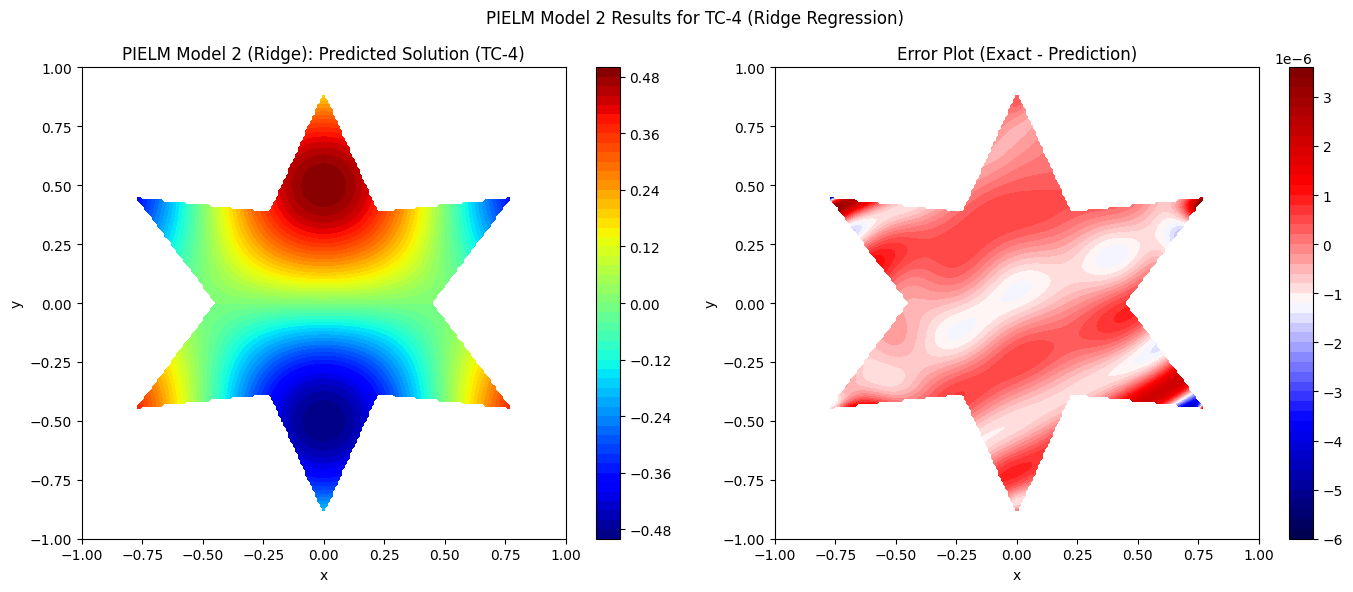

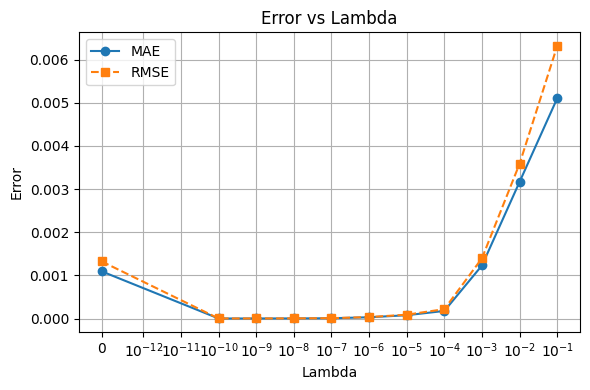

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_dx(z, w):
    """
    Calculates the partial derivative of the activation with respect to x.
    """
    return (1 - np.tanh(z)**2) * w[0]

def activation_dy(z, w):
    """
    Calculates the partial derivative of the activation with respect to y.
    """
    return (1 - np.tanh(z)**2) * w[1]

def exact_solution(x, y):
    """
    Defines the exact analytical solution for the 2D PDE.
    """
    return 0.5 * np.cos(np.pi * x) * np.sin(np.pi * y)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the PDE: u_x + 0.5 * u_y = f(x, y).
    """
    return -0.5 * np.pi * np.sin(np.pi * x) * np.sin(np.pi * y) + \
           0.25 * np.pi * np.cos(np.pi * x) * np.cos(np.pi * y)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of points and neurons
N_points = 921
N_bc = 240
N_neurons = N_points + N_bc

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
xy_domain = xy[mask][:N_points]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
xy_boundary = interpolate_boundary(xy_boundary_raw, N_bc)

# Set up collocation (field) points and boundary condition points
X_f = xy_domain
X_bc = xy_boundary

# Initialize network weights and biases for 2D input
d = 2
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix (H) and target vector (K)
Z_f = X_f @ W + b
H_fx = np.array([activation_dx(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
H_fy = np.array([activation_dy(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
H_f = H_fx + 0.5 * H_fy
R_f = rhs_function(X_f[:, 0], X_f[:, 1])

Z_bc = X_bc @ W + b
H_bc = activation(Z_bc)
R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

H_total = np.vstack((H_f, H_bc))
K_total = np.concatenate((R_f, R_bc))

# Define regularization parameters and initialize result lists
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
mae_list, rmse_list, C_list = [], [], []

# Pre-calculate values for the test grid to improve efficiency inside the loop
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
Zg = X_plot @ W + b
Hg = activation(Zg)  # Hidden layer output for the test grid
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

# Loop through each lambda to find the best regularization parameter
for lam in lambdas:
    # Solve for the output weights C using Ridge Regression
    if lam == 0:
        C_ridge = np.linalg.pinv(H_total) @ K_total
    else:
        temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
        C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

    C_list.append(C_ridge)

    # Make predictions and calculate errors for the current lambda
    u_pred = Hg @ C_ridge
    u_pred = u_pred.reshape(200, 200)
    u_pred[~domain_mask] = np.nan # Mask out points outside the domain

    error = u_exact - u_pred
    mae = np.nanmean(np.abs(error))
    rmse = np.sqrt(np.nanmean(error**2))

    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best lambda based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_lambda = lambdas[best_index]
best_C = C_list[best_index]

# Generate the final prediction and error using the best model
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred

# Stop measuring CPU time
Tcpu = time.process_time() - start_time

# Print the results for the best model
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the final results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 2 (Ridge): Predicted Solution (TC-4)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 2 Results for TC-4 (Ridge Regression)')
plt.tight_layout()
plt.show()

# Plot the relationship between the regularization parameter and model error
plt.figure(figsize=(6, 4))
plt.plot(lambdas, mae_list, 'o-', label='MAE')
plt.plot(lambdas, rmse_list, 's--', label='RMSE')
plt.xscale('symlog', linthresh=1e-12) # Use a symmetric log scale for the x-axis
plt.title('Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Number of Neurons: 1250
Mean Absolute Error (MAE): 1.288965e-04
Root Mean Square Error (RMSE): 1.830279e-04
CPU Time (Tcpu): 2.314255e+03 seconds


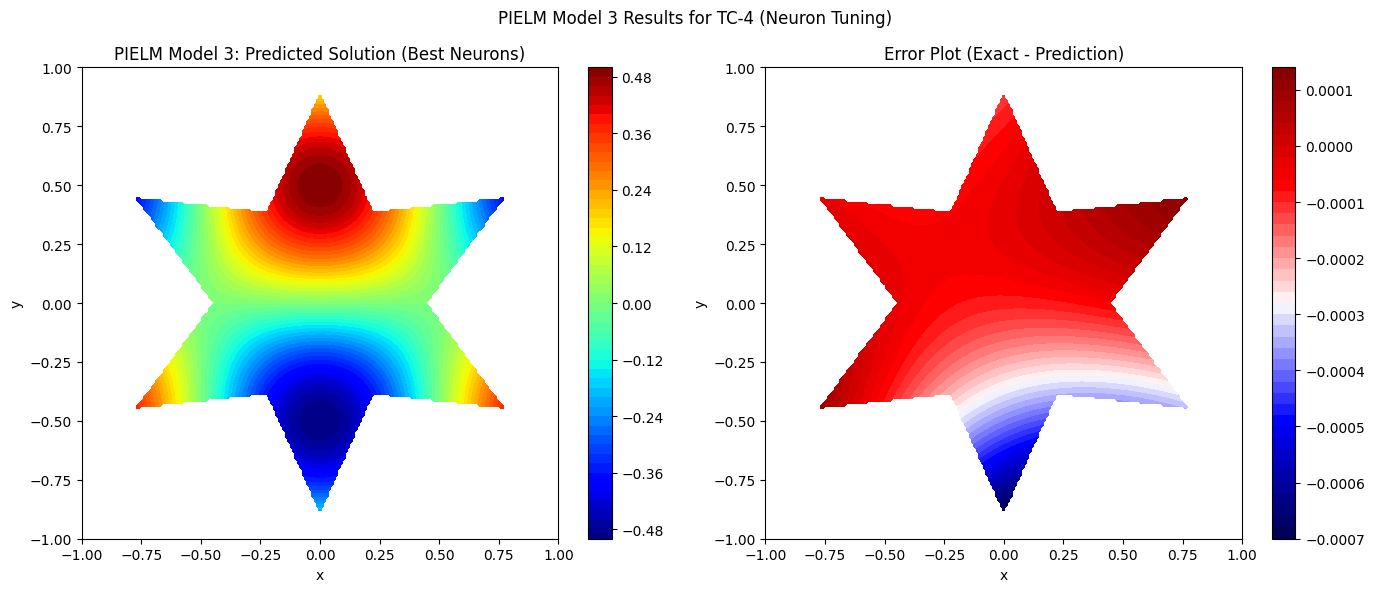

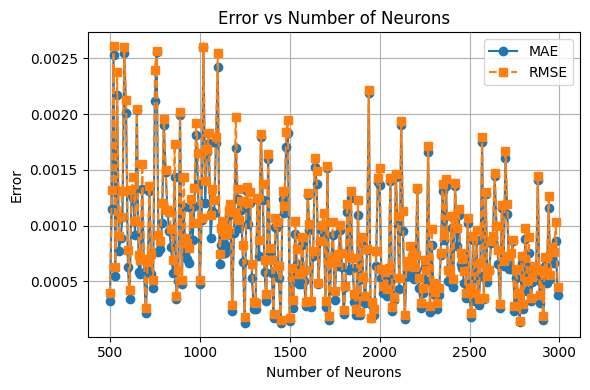

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_dx(z, w):
    """
    Calculates the partial derivative of the activation with respect to x.
    """
    return (1 - np.tanh(z)**2) * w[0]

def activation_dy(z, w):
    """
    Calculates the partial derivative of the activation with respect to y.
    """
    return (1 - np.tanh(z)**2) * w[1]

def exact_solution(x, y):
    """
    Defines the exact analytical solution for the 2D PDE.
    """
    return 0.5 * np.cos(np.pi * x) * np.sin(np.pi * y)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the PDE: u_x + 0.5 * u_y = f(x, y).
    """
    return -0.5 * np.pi * np.sin(np.pi * x) * np.sin(np.pi * y) + \
           0.25 * np.pi * np.cos(np.pi * x) * np.cos(np.pi * y)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation and boundary points
N_points = 921
N_bc = 240

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_points]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Pre-calculate values for the test grid to improve efficiency inside the loop
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

# Define neuron search range and initialize result lists
neuron_range = range(500, 3000, 10)
mae_list, rmse_list, neuron_list, C_list = [], [], [], []

# Loop through each neuron count to find the optimal network size
for N_neurons in neuron_range:
    # Reset the seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (2, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix (H) and target vector (K) for the current network size
    Z_f = X_f @ W + b
    H_fx = np.array([activation_dx(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
    H_fy = np.array([activation_dy(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
    H_f = H_fx + 0.5 * H_fy
    R_f = rhs_function(X_f[:, 0], X_f[:, 1])

    Z_bc = X_bc @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

    H_total = np.vstack((H_f, H_bc))
    K_total = np.concatenate((R_f, R_bc))

    # Solve for the output weights C using the Moore-Penrose pseudoinverse
    C = np.linalg.pinv(H_total) @ K_total
    C_list.append(C)
    neuron_list.append(N_neurons)

    # Make predictions on the test grid and calculate errors
    Zg = X_plot @ W + b
    Hg = activation(Zg)
    u_pred = (Hg @ C).reshape(200, 200)
    u_pred[~domain_mask] = np.nan # Mask out points outside the domain

    error = u_exact - u_pred
    mae = np.nanmean(np.abs(error))
    rmse = np.sqrt(np.nanmean(error**2))
    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best number of neurons based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_N = neuron_list[best_index]
best_C = C_list[best_index]

# Re-initialize the best network to generate the final prediction for plotting
np.random.seed(0)
W = np.random.uniform(-1, 1, (2, best_N))
b = np.random.uniform(-1, 1, (1, best_N))
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred

# Stop measuring CPU time
Tcpu = time.process_time() - start_time

# Print the results for the best model
print(f"Best Number of Neurons: {best_N}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the final results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 3: Predicted Solution (Best Neurons)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle(f'PIELM Model 3 Results for TC-4 (Neuron Tuning)')
plt.tight_layout()
plt.show()

# Plot the relationship between the number of neurons and model error
plt.figure(figsize=(6, 4))
plt.plot(neuron_list, mae_list, 'o-', label='MAE')
plt.plot(neuron_list, rmse_list, 's--', label='RMSE')
plt.title('Error vs Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Number of Neurons: 920
Best Lambda: 1.00e-10
Mean Absolute Error (MAE): 5.167370e-07
Root Mean Square Error (RMSE): 6.732527e-07
CPU Time (Tcpu): 1.407201e+03 seconds


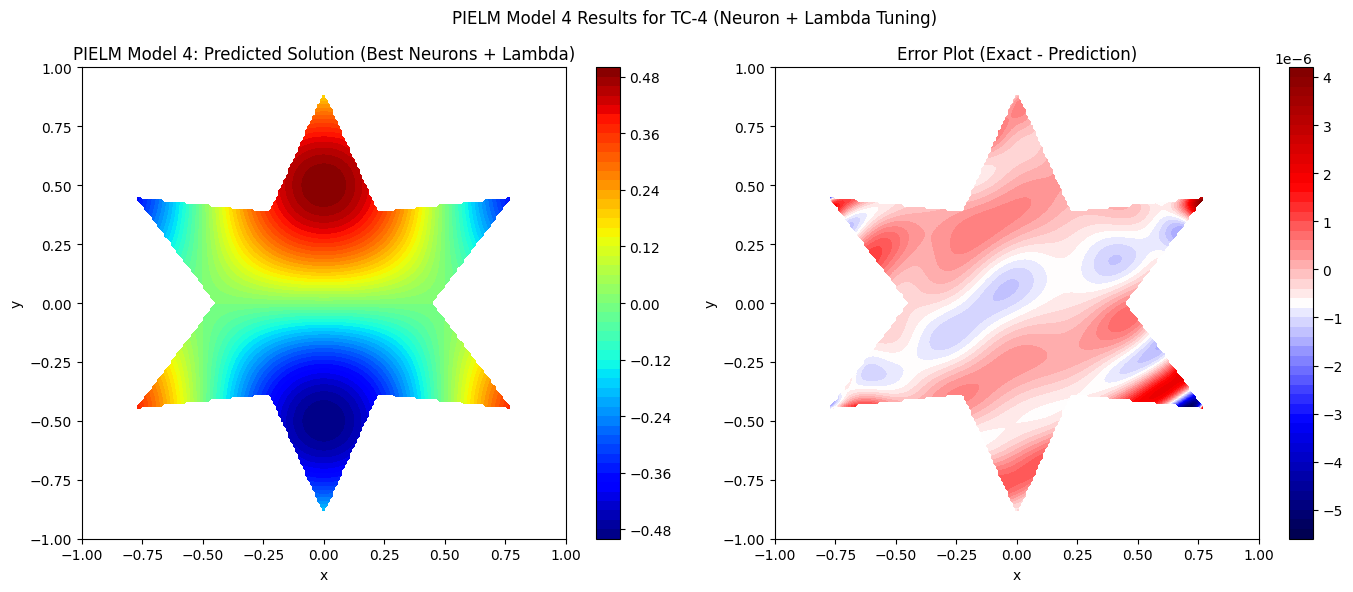

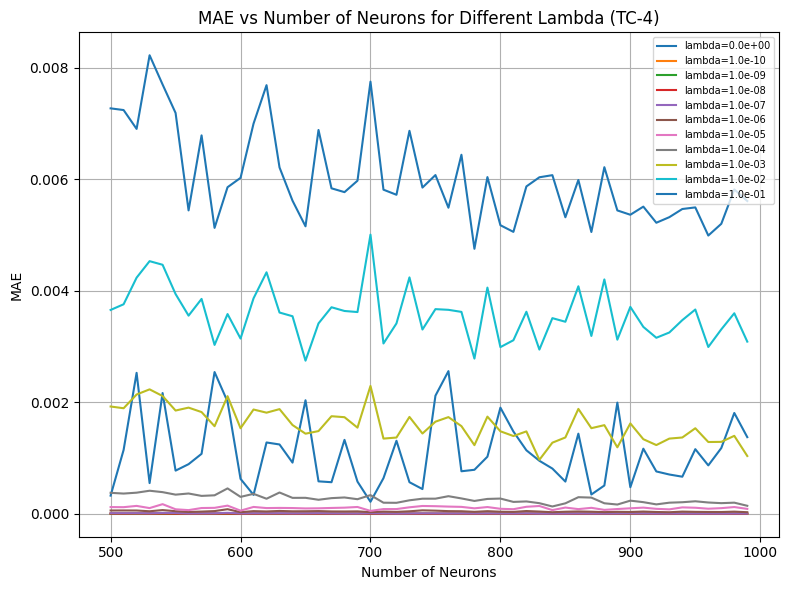

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time
import pandas as pd

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_dx(z, w):
    """
    Calculates the partial derivative of the activation with respect to x.
    """
    return (1 - np.tanh(z)**2) * w[0]

def activation_dy(z, w):
    """
    Calculates the partial derivative of the activation with respect to y.
    """
    return (1 - np.tanh(z)**2) * w[1]

def exact_solution(x, y):
    """
    Defines the exact analytical solution for the 2D PDE.
    """
    return 0.5 * np.cos(np.pi * x) * np.sin(np.pi * y)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the PDE: u_x + 0.5 * u_y = f(x, y).
    """
    return -0.5 * np.pi * np.sin(np.pi * x) * np.sin(np.pi * y) + \
           0.25 * np.pi * np.cos(np.pi * x) * np.cos(np.pi * y)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation and boundary points
N_points = 921
N_bc = 240

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_points]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Pre-calculate values for the test grid to improve efficiency inside the loops
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

# Define hyperparameter search space for neurons and lambda
neuron_range = range(500, 1000, 10)
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
results = []

# Outer loop: iterate through the number of neurons
for N_neurons in neuron_range:
    # Reset seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (2, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix (H) and target vector (K) once for each network size
    Z_f = X_f @ W + b
    H_fx = np.array([activation_dx(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
    H_fy = np.array([activation_dy(Z_f[:, i], W[:, i]) for i in range(N_neurons)]).T
    H_f = H_fx + 0.5 * H_fy
    R_f = rhs_function(X_f[:, 0], X_f[:, 1])

    Z_bc = X_bc @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

    H_total = np.vstack((H_f, H_bc))
    K_total = np.concatenate((R_f, R_bc))

    # Inner loop: iterate through regularization parameters
    for lam in lambdas:
        # Solve for the output weights C using Ridge Regression
        if lam == 0:
            C_ridge = np.linalg.pinv(H_total) @ K_total
        else:
            temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
            C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

        # Make predictions and calculate errors for the current hyperparameter combination
        Zg = X_plot @ W + b
        Hg = activation(Zg)
        u_pred = (Hg @ C_ridge).reshape(200, 200)
        u_pred[~domain_mask] = np.nan # Mask out points outside the domain

        error = u_exact - u_pred
        mae = np.nanmean(np.abs(error))
        rmse = np.sqrt(np.nanmean(error**2))

        # Store all results and parameters in a dictionary
        results.append({
            'neurons': N_neurons,
            'lambda': lam,
            'mae': mae,
            'rmse': rmse,
            'C': C_ridge,
            'W': W,
            'b': b
        })

# Find the best result by searching for the minimum MAE across all combinations
best_result = min(results, key=lambda x: x['mae'])

# Extract the parameters from the best performing model
best_N = best_result['neurons']
best_lambda = best_result['lambda']
best_C = best_result['C']
W = best_result['W']
b = best_result['b']

# Generate the final prediction using the best model's parameters
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred

# Stop measuring CPU time
Tcpu = time.process_time() - start_time

# Print the optimal hyperparameters and corresponding errors
print(f"Best Number of Neurons: {best_N}")
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {best_result['mae']:.6e}")
print(f"Root Mean Square Error (RMSE): {best_result['rmse']:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 4: Predicted Solution (Best Neurons + Lambda)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 4 Results for TC-4 (Neuron + Lambda Tuning)')
plt.tight_layout()
plt.show()

# Convert the results to a pandas DataFrame for easier analysis
df = pd.DataFrame(results)

# Plot MAE vs. Number of Neurons for each value of lambda
plt.figure(figsize=(8, 6))
for lam in lambdas:
    subset = df[df['lambda'] == lam]
    plt.plot(subset['neurons'], subset['mae'], label=f'lambda={lam:.1e}')

plt.title('MAE vs Number of Neurons for Different Lambda (TC-4)')
plt.xlabel('Number of Neurons')
plt.ylabel('MAE')
plt.legend(fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()

**Test Case 5 (TC-5): 2D Steady Linear Diffusion in a Star-Shaped Domain (Ω₁)**

**PDE:**
    uₓₓ + uᵧᵧ = R(x, y),    for (x, y) ∈ Ω₁

**Exact Solution:**
    u(x, y) = 0.5 + exp(−2·x² − 4·y²)

**Right-Hand Side (RHS):**
    R(x, y) = −4·exp(−2·x² − 4·y²) · (1 + 4·y² + 2·x²)

**Boundary Condition (Dirichlet):**
    u(x, y) = 0.5 + exp(−2·x² − 4·y²)    for (x, y) ∈ ∂Ω₁

**Domain Ω₁:**
    A regular 6-pointed star-shaped polygon.

**Collocation and Boundary Points:**
    - N_f = 921      (interior collocation points)
    - N_bc = 240     (boundary points)

**Objective:**
    Solve the diffusion equation using Physics-Informed Extreme Learning Machine (PIELM),
    and compare predictions to the exact solution.

Condition number of H^T H: 2.31e+21
Mean Absolute Error (MAE): 7.741843e-02
Root Mean Square Error (RMSE): 1.131628e-01
CPU Time (Tcpu): 2.946594e+01 seconds


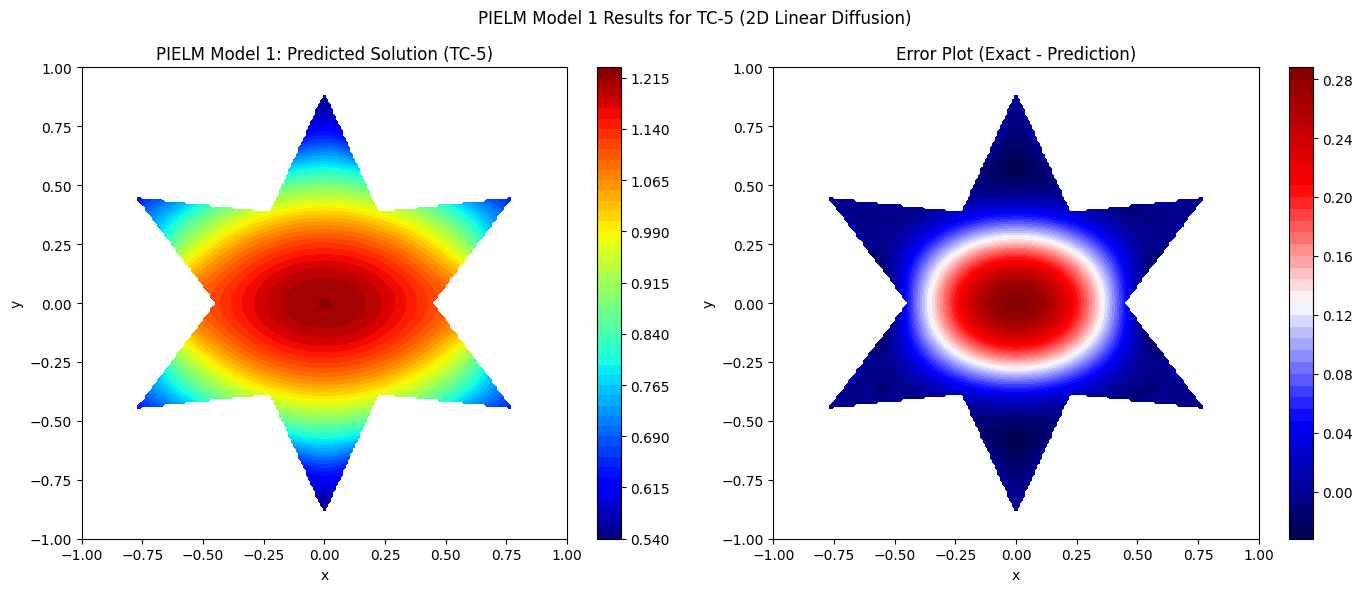

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_second_derivative(z, w):
    """
    Calculates the component for the second partial derivative of the activation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2) * w**2

def exact_solution(x, y):
    """
    Defines the exact analytical solution for comparison.
    """
    return 0.5 + np.exp(-2 * x**2 - 4 * y**2)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the partial differential equation being solved.
    """
    return -4 * np.exp(-2 * x**2 - 4 * y**2) * (1 + 4 * y**2 + 2 * x**2)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation, boundary, and neuron points
N_f = 921
N_bc = 240
N_neurons = 2000

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_f]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Initialize network weights and biases for 2D input
d = 2
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix for the collocation points
Z_f = X_f @ W + b
# Calculate the component for the second partial derivative u_xx
H_fxx = np.array([activation_second_derivative(Z_f[:, i], W[:, i][0]) for i in range(N_neurons)]).T
# Calculate the component for the second partial derivative u_yy
H_fyy = np.array([activation_second_derivative(Z_f[:, i], W[:, i][1]) for i in range(N_neurons)]).T
# Combine components to form the full PDE operator (Laplacian: u_xx + u_yy)
H_f = H_fxx + H_fyy
# Get the target values from the RHS of the PDE
R_f = rhs_function(X_f[:, 0], X_f[:, 1])

# Construct the system matrix for the boundary conditions
Z_bc = X_bc @ W + b
H_bc = activation(Z_bc)
# Get the target values from the exact solution on the boundary (Dirichlet condition)
R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

# Assemble the full system matrix and target vector
H_total = np.vstack((H_f, H_bc))
K_total = np.concatenate((R_f, R_bc))

# Calculate the condition number for stability analysis
cond_number = np.linalg.cond(H_total.T @ H_total)
print(f"Condition number of H^T H: {cond_number:.2e}")

# Solve for the output weights 'C' using the Moore-Penrose pseudoinverse
C = np.linalg.pinv(H_total) @ K_total

# Create a grid of points for plotting the final solution
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)

# Predict the solution over the entire grid
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = Hg @ C
u_pred = u_pred.reshape(200, 200)

# Calculate the exact solution over the grid for comparison
u_exact = exact_solution(Xg, Yg)

# Mask out points outside the star domain for visualization
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)
u_pred[~domain_mask] = np.nan
u_exact[~domain_mask] = np.nan

# Calculate error metrics, ignoring the masked-out (NaN) values
error = u_exact - u_pred
mae = np.nanmean(np.abs(error))
rmse = np.sqrt(np.nanmean(error**2))
Tcpu = time.process_time() - start_time

# Print the final error metrics and CPU time
print(f"Mean Absolute Error (MAE): {mae:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 1: Predicted Solution (TC-5)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 1 Results for TC-5 (2D Linear Diffusion)')
plt.tight_layout()
plt.show()

Best Lambda: 0.00e+00
Mean Absolute Error (MAE): 7.778368e-02
Root Mean Square Error (RMSE): 1.135997e-01
CPU Time (Tcpu): 1.375380e+01 seconds


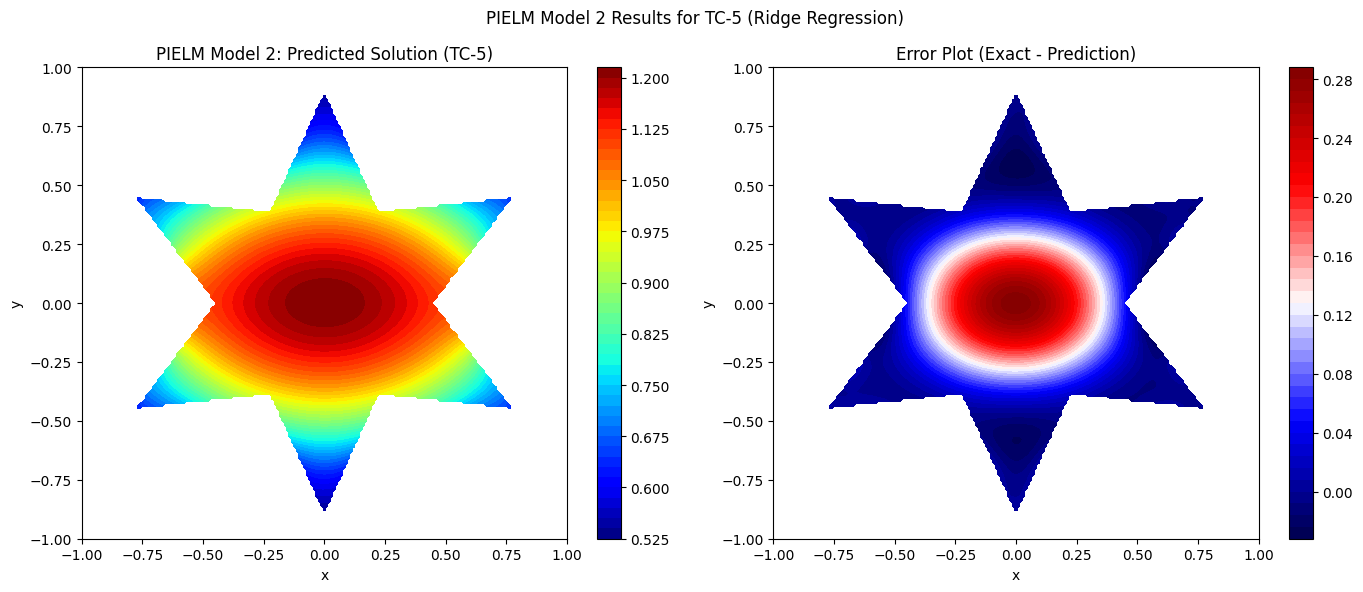

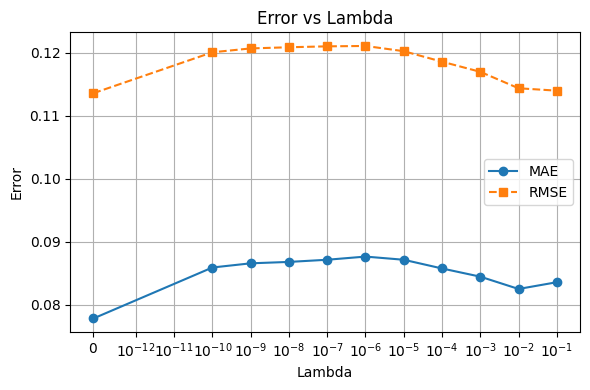

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_second_derivative(z, w):
    """
    Calculates the component for the second partial derivative of the activation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2) * w**2

def exact_solution(x, y):
    """
    Defines the exact analytical solution for comparison.
    """
    return 0.5 + np.exp(-2 * x**2 - 4 * y**2)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the partial differential equation being solved.
    """
    return -4 * np.exp(-2 * x**2 - 4 * y**2) * (1 + 4 * y**2 + 2 * x**2)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation, boundary, and neuron points
N_f = 921
N_bc = 240
N_neurons = N_f + N_bc

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_f]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Initialize network weights and biases for 2D input
d = 2
W = np.random.uniform(-1, 1, (d, N_neurons))
b = np.random.uniform(-1, 1, (1, N_neurons))

# Construct the system matrix (H) and target vector (K)
Z_f = X_f @ W + b
H_fxx = np.array([activation_second_derivative(Z_f[:, i], W[:, i][0]) for i in range(N_neurons)]).T
H_fyy = np.array([activation_second_derivative(Z_f[:, i], W[:, i][1]) for i in range(N_neurons)]).T
H_f = H_fxx + H_fyy
R_f = rhs_function(X_f[:, 0], X_f[:, 1])

Z_bc = X_bc @ W + b
H_bc = activation(Z_bc)
R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

H_total = np.vstack((H_f, H_bc))
K_total = np.concatenate((R_f, R_bc))

# Define regularization parameters and initialize result lists
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
mae_list, rmse_list, C_list = [], [], []

# Pre-calculate values for the test grid to improve efficiency inside the loop
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

Zg = X_plot @ W + b
Hg = activation(Zg)  # Hidden layer output for the test grid

# Loop through each lambda to find the best regularization parameter
for lam in lambdas:
    # Solve for the output weights C using Ridge Regression
    if lam == 0:
        C_ridge = np.linalg.pinv(H_total) @ K_total
    else:
        temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
        C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

    C_list.append(C_ridge)

    # Make predictions and calculate errors for the current lambda
    u_pred = Hg @ C_ridge
    u_pred = u_pred.reshape(200, 200)
    u_pred[~domain_mask] = np.nan # Mask out points outside the domain

    error = u_exact - u_pred
    mae = np.nanmean(np.abs(error))
    rmse = np.sqrt(np.nanmean(error**2))

    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best lambda based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_lambda = lambdas[best_index]
best_C = C_list[best_index]

# Generate the final prediction and error using the best model
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred
Tcpu = time.process_time() - start_time

# Print the results for the best model
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the final results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 2: Predicted Solution (TC-5)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 2 Results for TC-5 (Ridge Regression)')
plt.tight_layout()
plt.show()

# Plot the relationship between the regularization parameter and model error
plt.figure(figsize=(6, 4))
plt.plot(lambdas, mae_list, 'o-', label='MAE')
plt.plot(lambdas, rmse_list, 's--', label='RMSE')
plt.xscale('symlog', linthresh=1e-12) # Use a symmetric log scale for the x-axis
plt.title('Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Number of Neurons: 1110
Mean Absolute Error (MAE): 7.356297e-02
Root Mean Square Error (RMSE): 1.059652e-01
CPU Time (Tcpu): 2.648245e+03 seconds


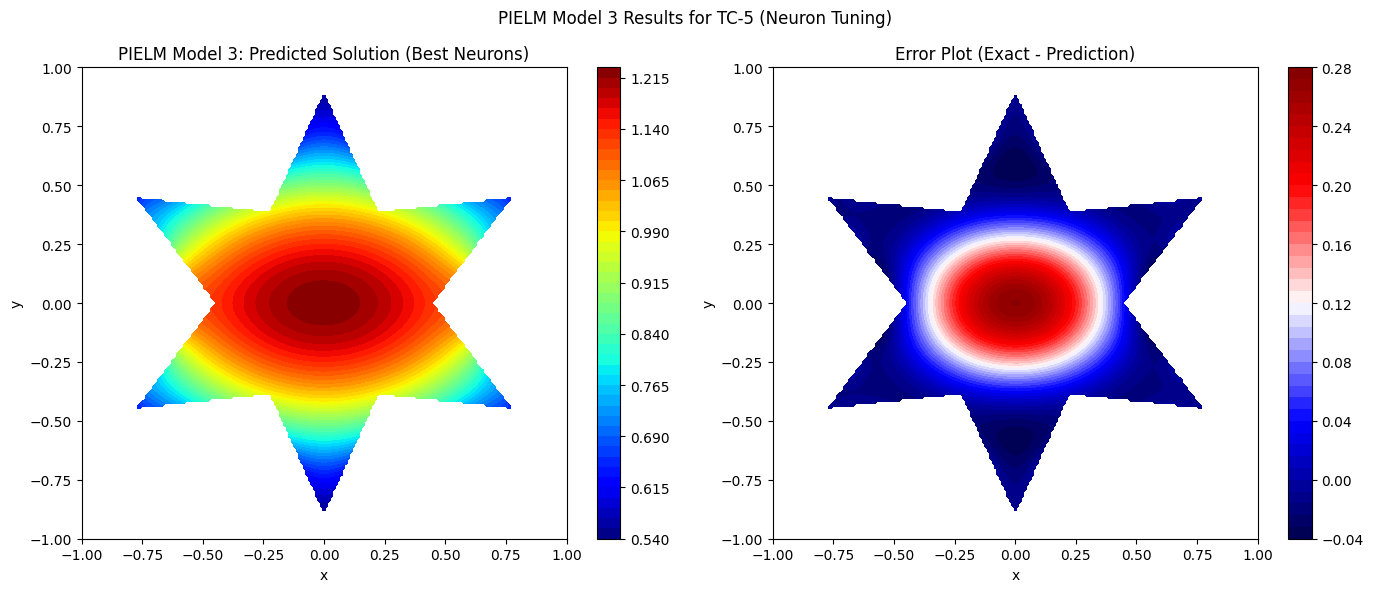

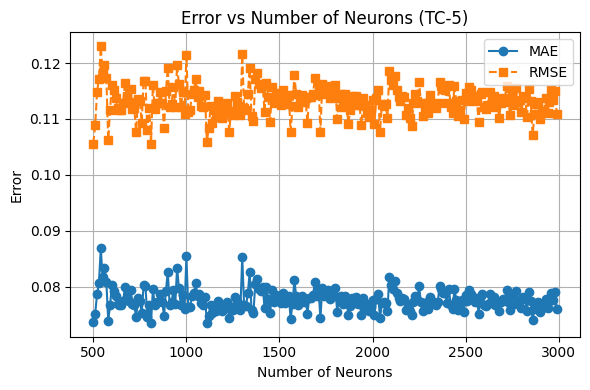

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_second_derivative(z, w):
    """
    Calculates the component for the second partial derivative of the activation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2) * w**2

def exact_solution(x, y):
    """
    Defines the exact analytical solution for comparison.
    """
    return 0.5 + np.exp(-2 * x**2 - 4 * y**2)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the partial differential equation being solved.
    """
    return -4 * np.exp(-2 * x**2 - 4 * y**2) * (1 + 4 * y**2 + 2 * x**2)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation and boundary points
N_f = 921
N_bc = 240

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_f]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Pre-calculate values for the test grid to improve efficiency inside the loop
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

# Define neuron search range and initialize result lists
neuron_range = range(500, 3000, 10)
mae_list, rmse_list, C_list, neuron_list = [], [], [], []

# Loop through each neuron count to find the optimal network size
for N_neurons in neuron_range:
    # Reset the seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (2, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix (H) and target vector (K) for the current network size
    Z_f = X_f @ W + b
    H_fxx = np.array([activation_second_derivative(Z_f[:, i], W[:, i][0]) for i in range(N_neurons)]).T
    H_fyy = np.array([activation_second_derivative(Z_f[:, i], W[:, i][1]) for i in range(N_neurons)]).T
    H_f = H_fxx + H_fyy
    R_f = rhs_function(X_f[:, 0], X_f[:, 1])

    Z_bc = X_bc @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

    H_total = np.vstack((H_f, H_bc))
    K_total = np.concatenate((R_f, R_bc))

    # Solve for the output weights C using the Moore-Penrose pseudoinverse
    C = np.linalg.pinv(H_total) @ K_total
    C_list.append(C)
    neuron_list.append(N_neurons)

    # Make predictions on the test grid and calculate errors
    Zg = X_plot @ W + b
    Hg = activation(Zg)
    u_pred = (Hg @ C).reshape(200, 200)
    u_pred[~domain_mask] = np.nan # Mask out points outside the domain

    error = u_exact - u_pred
    mae = np.nanmean(np.abs(error))
    rmse = np.sqrt(np.nanmean(error**2))
    mae_list.append(mae)
    rmse_list.append(rmse)

# Find the best number of neurons based on the minimum Mean Absolute Error
best_index = np.argmin(mae_list)
best_N = neuron_list[best_index]
best_C = C_list[best_index]

# Re-initialize the best network to generate the final prediction for plotting
np.random.seed(0)
W = np.random.uniform(-1, 1, (2, best_N))
b = np.random.uniform(-1, 1, (1, best_N))
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred
Tcpu = time.process_time() - start_time

# Print the results for the best model
print(f"Best Number of Neurons: {best_N}")
print(f"Mean Absolute Error (MAE): {mae_list[best_index]:.6e}")
print(f"Root Mean Square Error (RMSE): {rmse_list[best_index]:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Plot the final results
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 3: Predicted Solution (Best Neurons)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 3 Results for TC-5 (Neuron Tuning)')
plt.tight_layout()
plt.show()

# Plot the relationship between the number of neurons and model error
plt.figure(figsize=(6, 4))
plt.plot(neuron_list, mae_list, 'o-', label='MAE')
plt.plot(neuron_list, rmse_list, 's--', label='RMSE')
plt.title('Error vs Number of Neurons (TC-5)')
plt.xlabel('Number of Neurons')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Number of Neurons: 1110
Best Lambda: 0.00e+00
Mean Absolute Error (MAE): 7.356297e-02
Root Mean Square Error (RMSE): 1.059652e-01
CPU Time (Tcpu): 9.959714e+03 seconds


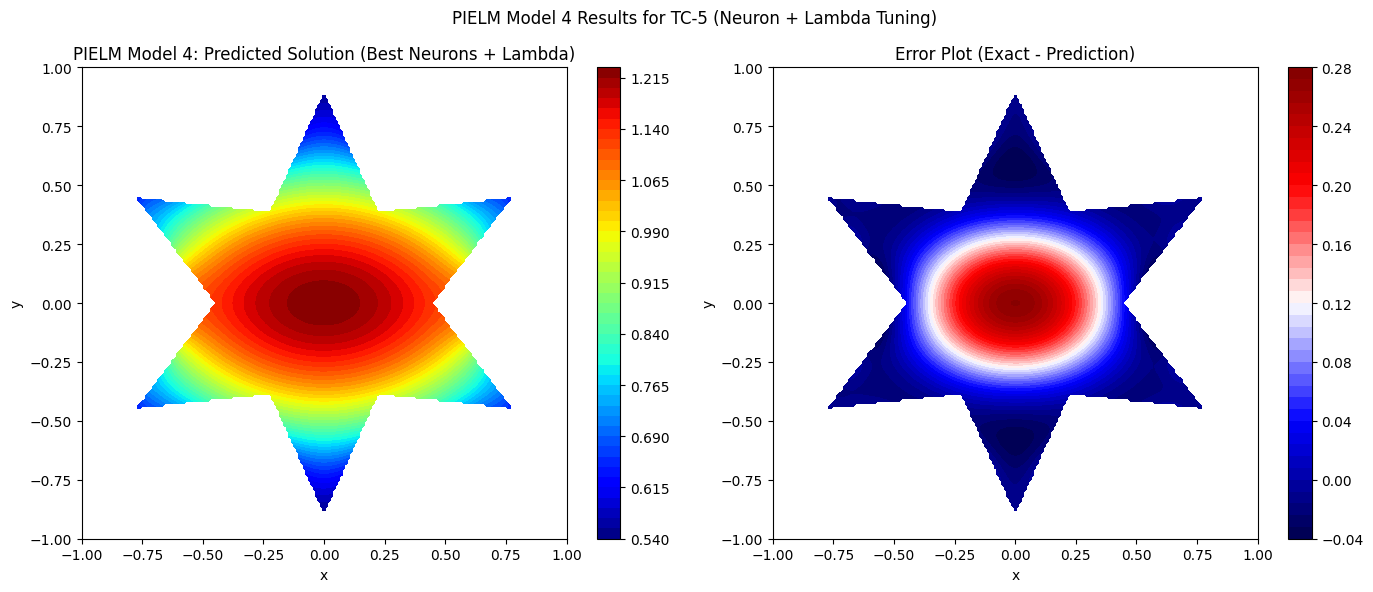

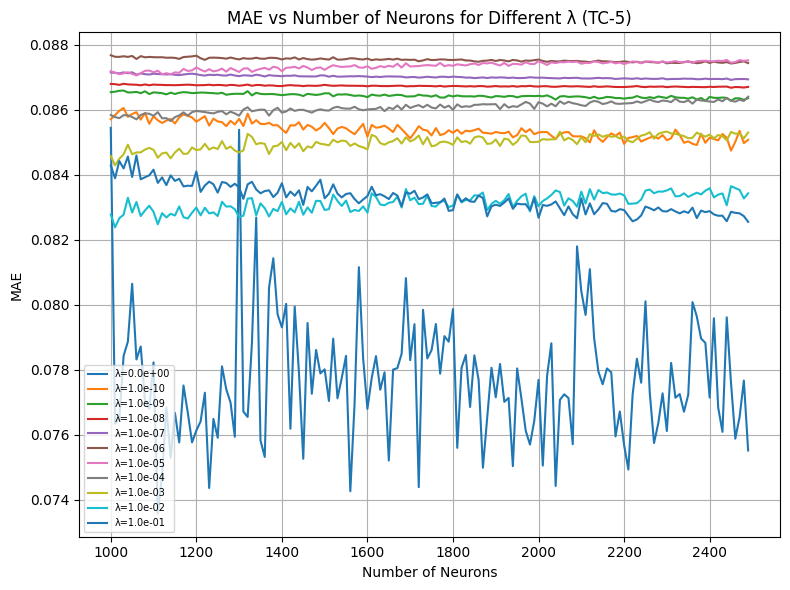

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.interpolate import interp1d
import pandas as pd
import time

def activation(z):
    """
    Hyperbolic tangent (tanh) activation function.
    """
    return np.tanh(z)

def activation_second_derivative(z, w):
    """
    Calculates the component for the second partial derivative of the activation.
    """
    return -2 * np.tanh(z) * (1 - np.tanh(z)**2) * w**2

def exact_solution(x, y):
    """
    Defines the exact analytical solution for comparison.
    """
    return 0.5 + np.exp(-2 * x**2 - 4 * y**2)

def rhs_function(x, y):
    """
    Right-Hand Side (RHS) of the partial differential equation being solved.
    """
    return -4 * np.exp(-2 * x**2 - 4 * y**2) * (1 + 4 * y**2 + 2 * x**2)

def generate_star_polygon(R_outer=0.9, R_inner=0.45, num_points=6):
    """
    Generates the vertices for a 6-pointed star polygon.
    """
    verts = []
    angle = np.pi / num_points
    rotation_offset = -np.pi / 6
    for i in range(2 * num_points):
        r = R_outer if i % 2 == 0 else R_inner
        theta = i * angle + rotation_offset
        verts.append((r * np.cos(theta), r * np.sin(theta)))
    verts.append(verts[0])
    return np.array(verts)

def interpolate_boundary(points, N):
    """
    Generates N evenly spaced points along the perimeter of a polygon.
    """
    if not np.allclose(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    deltas = np.diff(points, axis=0)
    dists = np.sqrt((deltas**2).sum(axis=1))
    cumulative = np.insert(np.cumsum(dists), 0, 0)
    cumulative /= cumulative[-1]
    interp = interp1d(cumulative, points, axis=0)
    return interp(np.linspace(0, 1, N))

def inside_star(x, y):
    """
    Checks if a set of (x, y) points are inside the star-shaped domain.
    """
    points = np.vstack((x, y)).T
    return star_path.contains_points(points)

# Start measuring CPU time and set random seed
start_time = time.process_time()
np.random.seed(0)

# Generate the star geometry and a path object for checking points
star_verts = generate_star_polygon()
star_path = Path(star_verts)

# Define the number of collocation and boundary points
N_f = 921
N_bc = 240

# Generate random points and use rejection sampling to get points inside the star
xy = np.random.rand(5000, 2) * 2 - 1
mask = inside_star(xy[:, 0], xy[:, 1])
X_f = xy[mask][:N_f]

# Generate evenly spaced points on the boundary of the star
xy_boundary_raw = star_verts[:-1]
X_bc = interpolate_boundary(xy_boundary_raw, N_bc)

# Pre-calculate values for the test grid to improve efficiency inside the loops
xg = np.linspace(-1, 1, 200)
yg = np.linspace(-1, 1, 200)
Xg, Yg = np.meshgrid(xg, yg)
X_plot = np.stack([Xg.ravel(), Yg.ravel()], axis=1)
u_exact = exact_solution(Xg, Yg)
domain_mask = inside_star(Xg.ravel(), Yg.ravel()).reshape(Xg.shape)

# Define hyperparameter search space for neurons and lambda
neuron_range = range(1000, 2500, 10)
lambdas = np.concatenate(([0], np.logspace(-10, -1, 10)))
results = []

# Outer loop: iterate through the number of neurons
for N_neurons in neuron_range:
    # Reset seed for consistent weight initialization for each network size
    np.random.seed(0)
    W = np.random.uniform(-1, 1, (2, N_neurons))
    b = np.random.uniform(-1, 1, (1, N_neurons))

    # Construct the system matrix (H) and target vector (K) once for each network size
    Z_f = X_f @ W + b
    H_fxx = np.array([activation_second_derivative(Z_f[:, i], W[:, i][0]) for i in range(N_neurons)]).T
    H_fyy = np.array([activation_second_derivative(Z_f[:, i], W[:, i][1]) for i in range(N_neurons)]).T
    H_f = H_fxx + H_fyy
    R_f = rhs_function(X_f[:, 0], X_f[:, 1])

    Z_bc = X_bc @ W + b
    H_bc = activation(Z_bc)
    R_bc = exact_solution(X_bc[:, 0], X_bc[:, 1])

    H_total = np.vstack((H_f, H_bc))
    K_total = np.concatenate((R_f, R_bc))

    # Inner loop: iterate through regularization parameters
    for lam in lambdas:
        # Solve for the output weights C using Ridge Regression
        if lam == 0:
            C_ridge = np.linalg.pinv(H_total) @ K_total
        else:
            temp = H_total @ H_total.T + lam * np.eye(H_total.shape[0])
            C_ridge = H_total.T @ np.linalg.solve(temp, K_total)

        # Make predictions and calculate errors for the current hyperparameter combination
        Zg = X_plot @ W + b
        Hg = activation(Zg)
        u_pred = (Hg @ C_ridge).reshape(200, 200)
        u_pred[~domain_mask] = np.nan # Mask out points outside the domain
        error = u_exact - u_pred
        mae = np.nanmean(np.abs(error))
        rmse = np.sqrt(np.nanmean(error**2))

        # Store all results and parameters in a dictionary
        results.append({
            'neurons': N_neurons,
            'lambda': lam,
            'mae': mae,
            'rmse': rmse,
            'C': C_ridge,
            'W': W,
            'b': b
        })

# Find the best result by searching for the minimum MAE across all combinations
best_result = min(results, key=lambda x: x['mae'])

# Extract the parameters from the best performing model
best_N = best_result['neurons']
best_lambda = best_result['lambda']
best_C = best_result['C']
W = best_result['W']
b = best_result['b']

# Generate the final prediction using the best model's parameters
Zg = X_plot @ W + b
Hg = activation(Zg)
u_pred = (Hg @ best_C).reshape(200, 200)
u_pred[~domain_mask] = np.nan
error = u_exact - u_pred

# Stop measuring CPU time
Tcpu = time.process_time() - start_time

# Print the optimal hyperparameters and corresponding errors
print(f"Best Number of Neurons: {best_N}")
print(f"Best Lambda: {best_lambda:.2e}")
print(f"Mean Absolute Error (MAE): {best_result['mae']:.6e}")
print(f"Root Mean Square Error (RMSE): {best_result['rmse']:.6e}")
print(f"CPU Time (Tcpu): {Tcpu:.6e} seconds")

# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted solution for the best model
plt.subplot(1, 2, 1)
plt.contourf(Xg, Yg, u_pred, levels=50, cmap='jet')
plt.colorbar()
plt.title('PIELM Model 4: Predicted Solution (Best Neurons + Lambda)')
plt.xlabel('x')
plt.ylabel('y')

# Subplot 2: Error plot for the best model
plt.subplot(1, 2, 2)
plt.contourf(Xg, Yg, error, levels=50, cmap='seismic')
plt.colorbar()
plt.title('Error Plot (Exact - Prediction)')
plt.xlabel('x')
plt.ylabel('y')

plt.suptitle('PIELM Model 4 Results for TC-5 (Neuron + Lambda Tuning)')
plt.tight_layout()
plt.show()

# Convert the results to a pandas DataFrame for easier analysis
df = pd.DataFrame(results)

# Plot MAE vs. Number of Neurons for each value of lambda
plt.figure(figsize=(8, 6))
for lam in lambdas:
    subset = df[df['lambda'] == lam]
    plt.plot(subset['neurons'], subset['mae'], label=f'λ={lam:.1e}')
plt.title('MAE vs Number of Neurons for Different λ (TC-5)')
plt.xlabel('Number of Neurons')
plt.ylabel('MAE')
plt.legend(fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()